In [4260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4261]:
ipl_matches = pd.read_csv('ipl/IPL_Matches_2008_2022.csv')
ipl_ball_by_ball = pd.read_csv('ipl/IPL_Ball_by_Ball_2008_2022.csv')

1. toss win vs match result
2. toss winner choice
3. toss winner choice by date, venue, team
4. most number of balls faced by a batsmen
5. most number of balls bowled
6. top bowlers with most extras
7. top bowlers based on economy, wickets
8. top batsmens with their most paired non striker
9. players who played all thier matches(by season) with their performances
10. total runs by venues
11. Batsmen, avg, sr, consistency, time series
12. Bowler, avg, sr, consistency, time series
13. Most wickets
14. Most runs
15. Most number of sixes, fours, running by batsmen (#non_boundary)
16. Most common dismisal type; by venue, by season
17. Most ipl matches hosted by a venue
18. Most ipl matches won by a team
19. Most ipl Cups won
20. Most matches as a umpire
21. total super over in history, bat/bowl first has a impact?, typical score 
22. Win by highest margin bat and bowl
23. normal vs D/L
24. Most number of wickets by over
25. Most team won tosses
26. Which venue results in a win for Batting first team and vice versa
27. Total runs in 19th overs, sr of players
28. aggregate avg in 1-9 / 1-6 of players with sr
29. diff in avgs between 1st innings adn 2nd innings batter
30. diff in avgs, eco, sr between 1st innings adn 2nd innings bowler
31. head to head (player, team)
32. divide wickets taken by stages(powerplay middle over, death)
33. divide runs,sr,avg scored by stages(powerplay middle over, death)
34. runs_by_boundries /  runs_by_running

In [4262]:
ipl_matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [4263]:
ipl_ball_by_ball[ipl_ball_by_ball['ID'] == 1312200].head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4265]:
ipl_matches['method'].value_counts()

D/L    19
Name: method, dtype: int64

In [4266]:
ipl_ball_by_ball['non_boundary'].value_counts()

0    225933
1        21
Name: non_boundary, dtype: int64

In [4267]:
def is_win(TossWinner, WinningTeam):
    if TossWinner == WinningTeam:
        return "Match Won"
    return "Match Lost"

d = np.vectorize(is_win)(ipl_matches['TossWinner'], ipl_matches['WinningTeam'])
d = pd.DataFrame(d, columns=['is_win'])

In [4268]:
d.value_counts(normalize=True)

is_win    
Match Won     0.514737
Match Lost    0.485263
dtype: float64

### Toss winner comparsion with match wins

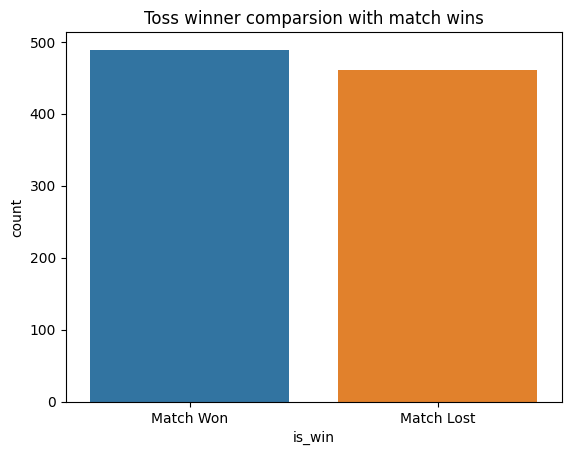

In [4269]:
sns.countplot(data=d, x='is_win', order=['Match Won', 'Match Lost'])
plt.title("Toss winner comparsion with match wins");

In [4270]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

### 2. Toss winner choice

In [4271]:
ipl_matches['TossDecision'].value_counts(normalize=True)

field    0.630526
bat      0.369474
Name: TossDecision, dtype: float64

In [4272]:
pd.DataFrame(ipl_matches.groupby(['Season'])['TossDecision'].value_counts(normalize=True, dropna=False)).unstack()

TossDecision          
TossDecision          bat     field
Season                             
2007/08          0.448276  0.551724
2009             0.614035  0.385965
2009/10          0.650000  0.350000
2011             0.342466  0.657534
2012             0.500000  0.500000
2013             0.592105  0.407895
2014             0.316667  0.683333
2015             0.423729  0.576271
2016             0.183333  0.816667
2017             0.186441  0.813559
2018             0.166667  0.833333
2019             0.166667  0.833333
2020/21          0.450000  0.550000
2021             0.266667  0.733333
2022             0.202703  0.797297

In [4273]:
ipl_matches.groupby(['Season'])['ID'].count()

Season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
Name: ID, dtype: int64

In [4274]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

<AxesSubplot: xlabel='Season', ylabel='count'>

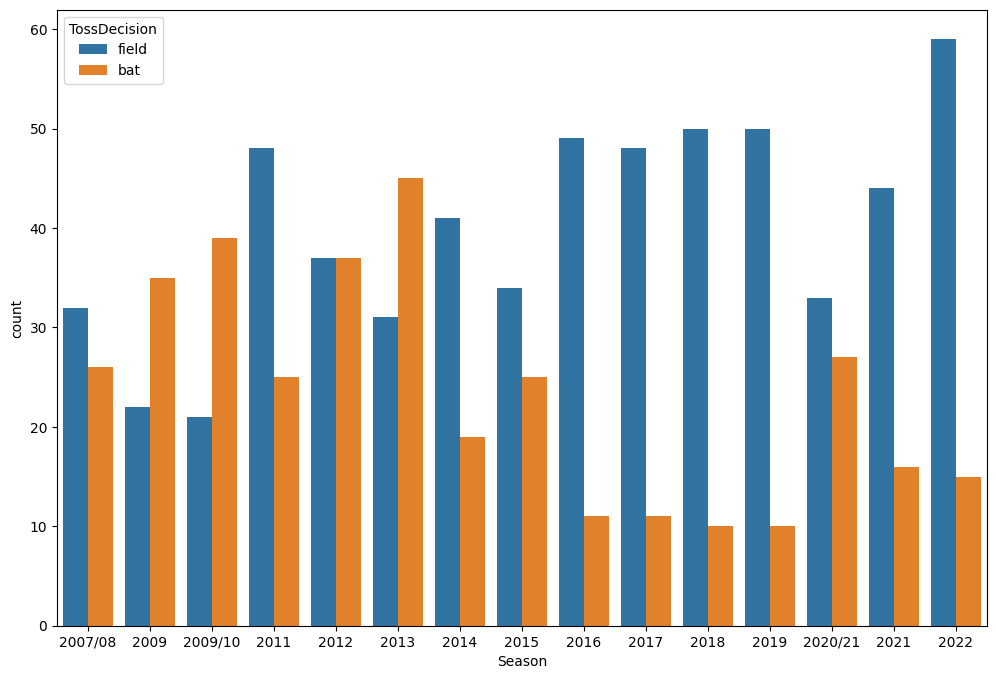

In [4275]:
plt.figure(figsize=(12, 8))
sns.countplot(data=ipl_matches[::-1], x='Season',hue='TossDecision')

In [4276]:
# plt.figure(figsize=(12, 8))
# sns.histplot(data=ipl_matches[::-1], x='Season', hue='TossDecision', multiple="dodge", 
#                   stat = 'percent', shrink = 0.8, common_norm=True)

In [4277]:
ipl_matches[ipl_matches['Season'] == '2012']['TossDecision'].value_counts()

bat      37
field    37
Name: TossDecision, dtype: int64

In [4278]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

### Total teams participated in IPL

In [4279]:
ipl_matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [4280]:
sorted(ipl_matches['Team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Gujarat Titans',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Pune Warriors',
 'Punjab Kings',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [4281]:
ipl_matches['Team1'].nunique()

18

In [4282]:
ipl_total_matches = (ipl_matches['Team1'].value_counts() + ipl_matches['Team2'].value_counts())
ipl_total_matches = pd.DataFrame(ipl_total_matches, columns=['Matches'])
# ipl_matches['TossWinner'].value_counts()
ipl_total_matches = ipl_total_matches.merge(ipl_matches['TossWinner'].value_counts(), left_index=True, right_index=True)

In [4283]:
ipl_total_matches

,Matches,TossWinner
Chennai Super Kings,208,109
Deccan Chargers,75,43
Delhi Capitals,63,36
Delhi Daredevils,161,80
Gujarat Lions,30,15
Gujarat Titans,16,10
Kings XI Punjab,190,85
Kochi Tuskers Kerala,14,8
Kolkata Knight Riders,223,114
Lucknow Super Giants,15,7


In [4284]:
161 + 63

224

In [4285]:
ipl_total_matches

,Matches,TossWinner
Chennai Super Kings,208,109
Deccan Chargers,75,43
Delhi Capitals,63,36
Delhi Daredevils,161,80
Gujarat Lions,30,15
Gujarat Titans,16,10
Kings XI Punjab,190,85
Kochi Tuskers Kerala,14,8
Kolkata Knight Riders,223,114
Lucknow Super Giants,15,7


In [4286]:
ipl_total_matches.loc['Delhi Capitals'] = [
                                                 ipl_total_matches.loc['Delhi Capitals']['Matches'] \
                                                + ipl_total_matches.loc['Delhi Daredevils']['Matches'],
                                                
                                                ipl_total_matches.loc['Delhi Capitals']['TossWinner'] \
                                                + ipl_total_matches.loc['Delhi Daredevils']['TossWinner']
                    
                                            ]

In [4287]:
ipl_total_matches = ipl_total_matches.drop('Delhi Daredevils')

In [4288]:
ipl_total_matches.loc['Punjab Kings'] = [
    ipl_total_matches.loc['Punjab Kings']['Matches'] + ipl_total_matches.loc['Kings XI Punjab']['Matches'],
    ipl_total_matches.loc['Punjab Kings']['TossWinner'] + ipl_total_matches.loc['Kings XI Punjab']['TossWinner']
]
ipl_total_matches = ipl_total_matches.drop('Kings XI Punjab')

In [4289]:
ipl_total_matches.loc['Rising Pune Supergiant'] = [
    ipl_total_matches.loc['Rising Pune Supergiant']['Matches'] + ipl_total_matches.loc['Rising Pune Supergiants']['Matches'],
    ipl_total_matches.loc['Rising Pune Supergiant']['TossWinner'] + ipl_total_matches.loc['Rising Pune Supergiants']['TossWinner']
]
ipl_total_matches = ipl_total_matches.drop('Rising Pune Supergiants')

In [4290]:
# ipl_total_matches.loc['Rising Pune Supergiant']['Matches'] + ipl_total_matches.loc['Rising Pune Supergiants']['Matches']

In [4291]:
ipl_total_matches = ipl_total_matches.sort_values(by='Matches', ascending=False)

In [4292]:
ipl_total_matches['pct_toss_vs_matches'] = np.round(ipl_total_matches['TossWinner'] / ipl_total_matches['Matches'], 2) * 100

In [4293]:
ipl_total_matches

,Matches,TossWinner,pct_toss_vs_matches
Mumbai Indians,231,123,53.0
Royal Challengers Bangalore,226,105,46.0
Delhi Capitals,224,116,52.0
Kolkata Knight Riders,223,114,51.0
Punjab Kings,218,94,43.0
Chennai Super Kings,208,109,52.0
Rajasthan Royals,192,99,52.0
Sunrisers Hyderabad,152,74,49.0
Deccan Chargers,75,43,57.0
Pune Warriors,46,20,43.0


In [4294]:
ipl_matches['Season'].value_counts()

2013       76
2022       74
2012       74
2011       73
2021       60
2020/21    60
2019       60
2018       60
2016       60
2014       60
2009/10    60
2017       59
2015       59
2007/08    58
2009       57
Name: Season, dtype: int64

In [4295]:
ipl_matches['Team2'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 950 entries, 0 to 949
Series name: Team2
Non-Null Count  Dtype 
--------------  ----- 
950 non-null    object
dtypes: object(1)
memory usage: 7.5+ KB


In [4296]:
190 + 28

218

Text(0, 0.5, 'Teams')

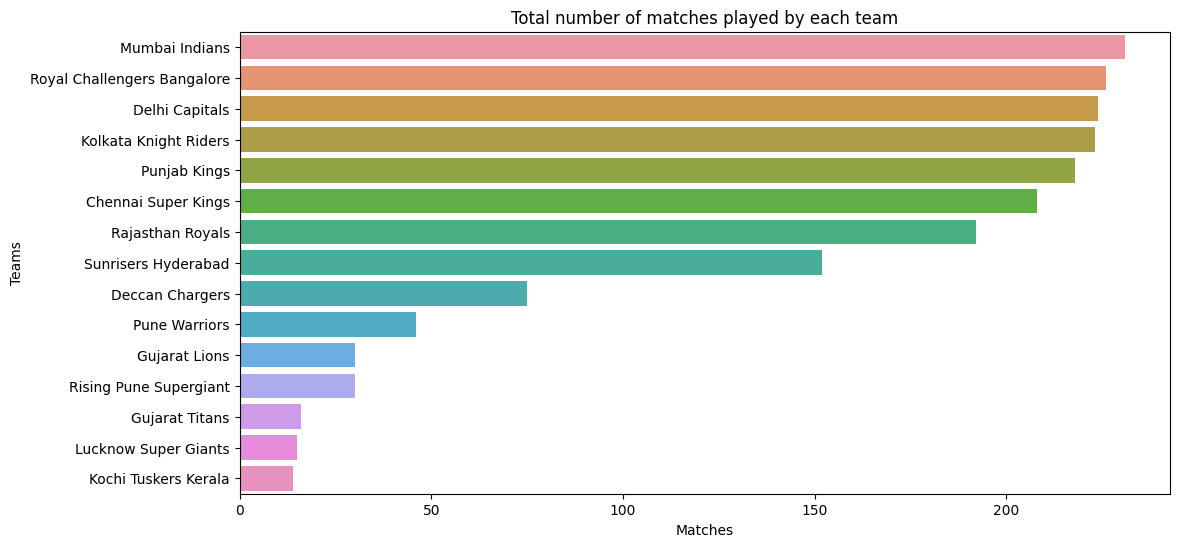

In [4297]:
plt.figure(figsize=(12, 6))
# plt.xticks(rotation=90)
ax = sns.barplot(data=ipl_total_matches.reset_index(), x='Matches', y='index', orient='h')
# ax.bar_label(ax.containers[0], padding=1);
plt.title("Total number of matches played by each team")
plt.ylabel("Teams")
# plt.savefig('Total-number-of-matches-played-by-each-team.png')

In [4298]:
ipl_matches.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [4299]:
ipl_matches['TossWinner'].value_counts()

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Lucknow Super Giants             7
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: TossWinner, dtype: int64

In [4300]:
9 + 85

94

In [4301]:
ipl_total_matches

,Matches,TossWinner,pct_toss_vs_matches
Mumbai Indians,231,123,53.0
Royal Challengers Bangalore,226,105,46.0
Delhi Capitals,224,116,52.0
Kolkata Knight Riders,223,114,51.0
Punjab Kings,218,94,43.0
Chennai Super Kings,208,109,52.0
Rajasthan Royals,192,99,52.0
Sunrisers Hyderabad,152,74,49.0
Deccan Chargers,75,43,57.0
Pune Warriors,46,20,43.0


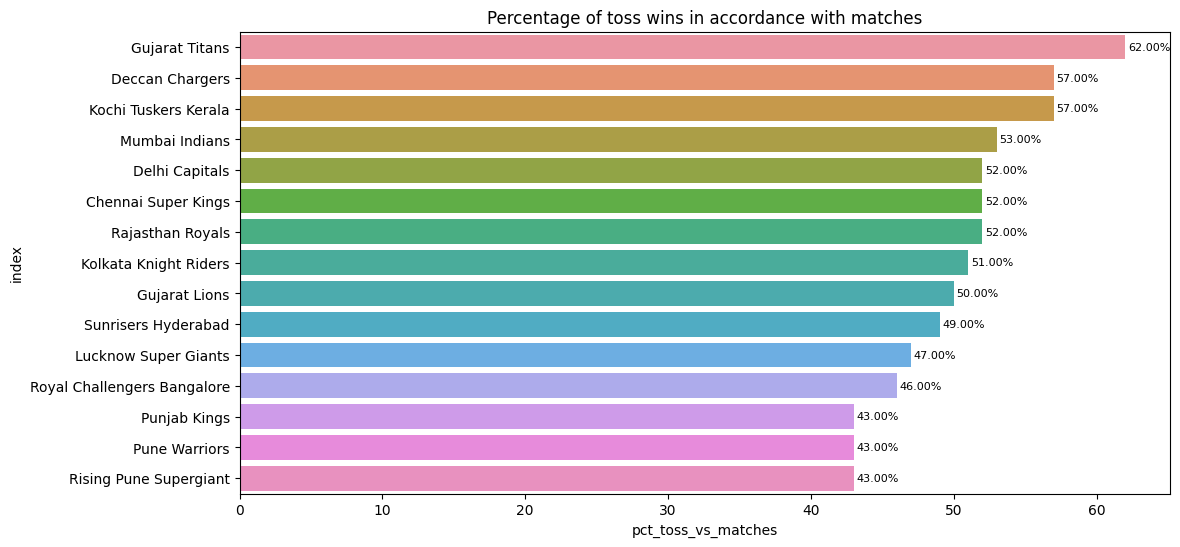

In [4302]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=ipl_total_matches.reset_index().sort_values(by='pct_toss_vs_matches', ascending=False), x='pct_toss_vs_matches', y='index', orient='h')
labels = [f'{v.get_width():.2f}%' for v in ax.containers[0].patches]
ax.bar_label(ax.containers[0], labels=labels, label_type='edge', fontsize=8, rotation=0, padding=2);
plt.title('Percentage of toss wins in accordance with matches');


In [4303]:
# sns.barplot(data=ipl_total_matches.reset_index(), x='Matches', y='index', orient='h')
# sns.barplot(data=ipl_total_matches.reset_index(), x='TossWinner', y='index', orient='h')

In [4304]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [4305]:
# pd.melt(ipl_total_matches.reset_index().rename(columns={"index": "Team"}))
ipl_total_matches.reset_index().drop('pct_toss_vs_matches', axis=1).melt(id_vars='index')

,index,variable,value
0,Mumbai Indians,Matches,231
1,Royal Challengers Bangalore,Matches,226
2,Delhi Capitals,Matches,224
3,Kolkata Knight Riders,Matches,223
4,Punjab Kings,Matches,218
5,Chennai Super Kings,Matches,208
6,Rajasthan Royals,Matches,192
7,Sunrisers Hyderabad,Matches,152
8,Deccan Chargers,Matches,75
9,Pune Warriors,Matches,46


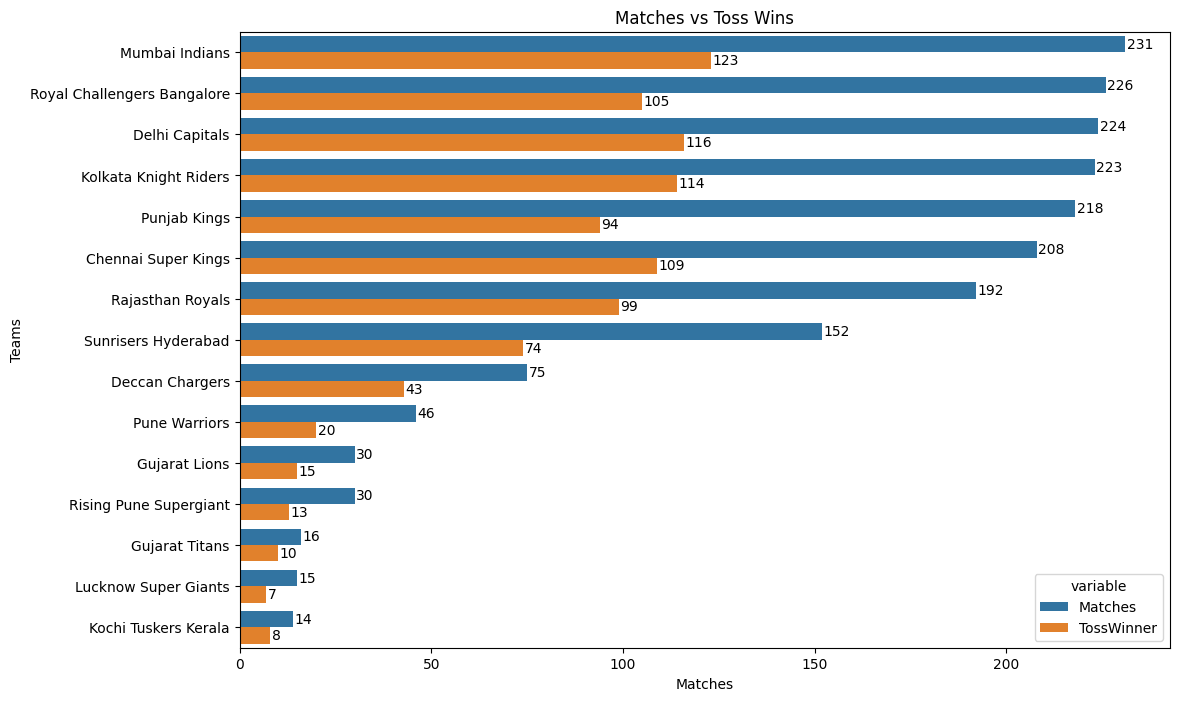

In [4306]:
plt.figure(figsize=(12, 8))
ax= sns.barplot(
    data=ipl_total_matches.reset_index().drop('pct_toss_vs_matches', axis=1).melt(id_vars='index'),
    x='value',
    y='index',
    hue='variable',
    orient='h'
)
for container in ax.containers:
    ax.bar_label(container, padding=1)
plt.ylabel('Teams')
plt.xlabel('Matches')
plt.title('Matches vs Toss Wins');

In [4307]:
# convert above graph to relative
ipl_total_matches

,Matches,TossWinner,pct_toss_vs_matches
Mumbai Indians,231,123,53.0
Royal Challengers Bangalore,226,105,46.0
Delhi Capitals,224,116,52.0
Kolkata Knight Riders,223,114,51.0
Punjab Kings,218,94,43.0
Chennai Super Kings,208,109,52.0
Rajasthan Royals,192,99,52.0
Sunrisers Hyderabad,152,74,49.0
Deccan Chargers,75,43,57.0
Pune Warriors,46,20,43.0


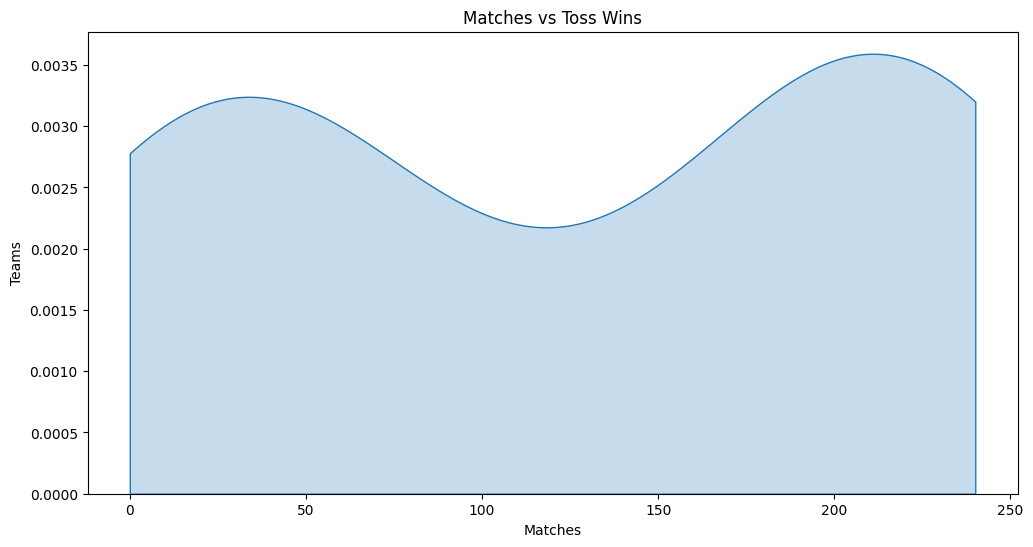

In [4308]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=ipl_total_matches, x='Matches', clip=(0, 240), fill=True)
# sns.kdeplot(data=ipl_total_matches, x='TossWinner', clip=(0, 130), fill=True, multiple="stack")
# sns.kdeplot(data=ipl_total_matches, x='pct_toss_vs_matches', clip=(0, 100), fill=True)

# for container in ax.containers:
#     ax.bar_label(container, padding=1)
plt.ylabel('Teams')
plt.xlabel('Matches')
plt.title('Matches vs Toss Wins');

In [4309]:
ipl_matches['MatchNumber'].unique()

array(['Final', 'Qualifier 2', 'Eliminator', 'Qualifier 1', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32', '31', '30', '29', '28', '27', '26', '25',
       '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14',
       '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2',
       '1', 'Qualifier', 'Elimination Final', '72', '71',
       '3rd Place Play-Off', 'Semi Final'], dtype=object)

In [4310]:
ipl_main_matches =  ipl_matches[~(ipl_matches['MatchNumber'].str.isdigit())]

In [4311]:
ipl_main_matches = np.vectorize(is_win)(ipl_main_matches['TossWinner'], ipl_main_matches['WinningTeam'])
ipl_main_matches = pd.DataFrame(ipl_main_matches, columns=['is_win'])

In [4312]:
ipl_main_matches.value_counts(normalize=True)

is_win    
Match Won     0.586207
Match Lost    0.413793
dtype: float64

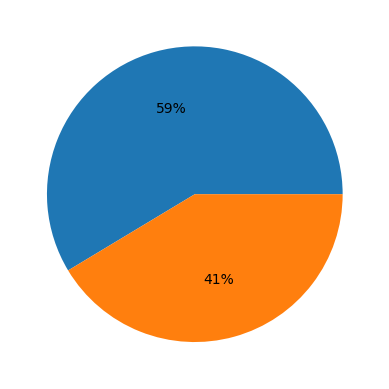

In [4313]:
plt.pie(ipl_main_matches.value_counts(normalize=True), autopct='%.0f%%');

In [4314]:
d.value_counts(normalize=True)

is_win    
Match Won     0.514737
Match Lost    0.485263
dtype: float64

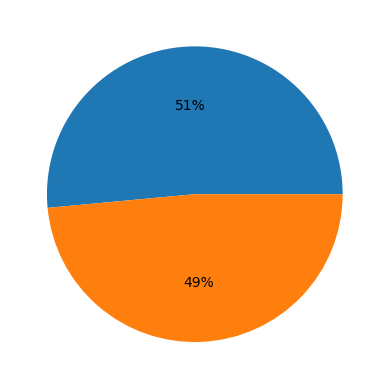

In [4315]:
plt.pie(d.value_counts(normalize=True), autopct='%.0f%%');

Most number of balls faced by a batsmen ranked

In [4316]:
ipl_ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [4317]:
ipl_ball_by_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [4318]:
ipl_ball_by_ball['extra_type'].isnull()

0          True
1         False
2          True
3          True
4          True
          ...  
225949    False
225950     True
225951     True
225952    False
225953     True
Name: extra_type, Length: 225954, dtype: bool

In [4319]:
# Top ten batsmen based on number of balls faced
# ipl_ball_by_ball[ipl_ball_by_ball]
ipl_ball_by_ball[ipl_ball_by_ball['extra_type'].isin([np.nan, 'legbyes', 'penalty', 'noballs'])]['batter'].value_counts().head(20)

V Kohli           5129
S Dhawan          4938
RG Sharma         4527
DA Warner         4170
SK Raina          4045
RV Uthappa        3796
MS Dhoni          3673
AB de Villiers    3402
G Gambhir         3400
AM Rahane         3373
CH Gayle          3336
KD Karthik        3296
AT Rayudu         3292
MK Pandey         3002
KL Rahul          2857
SR Watson         2811
F du Plessis      2600
SV Samson         2595
PA Patel          2350
KA Pollard        2326
Name: batter, dtype: int64

In [4320]:
# Total number of batsmens who have atleast faced one ball from the entirety of IPL
ipl_ball_by_ball['batter'].unique().shape[0]

605

In [4321]:
ipl_ball_by_ball[ipl_ball_by_ball['extra_type'].isin([np.nan, 'byes', 'legbyes'])]['bowler'].value_counts()

R Ashwin           3900
SP Narine          3463
Harbhajan Singh    3416
PP Chawla          3274
B Kumar            3262
                   ... 
SN Khan               2
SPD Smith             2
DA Warner             1
YBK Jaiswal           1
AC Gilchrist          1
Name: bowler, Length: 472, dtype: int64

In [4322]:
ipl_ball_by_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [4323]:
# Total number of bowlers who have atleast bowled a single delivery from the entirety of IPL
ipl_ball_by_ball['bowler'].unique().shape[0]

472

In [4324]:
# players who have both batted and bowled in IPL
f = set(ipl_ball_by_ball['batter'].unique()).intersection(set(ipl_ball_by_ball['bowler'].unique()))

In [4325]:
len(f)

425

In [4326]:
list(ipl_ball_by_ball['batter'].unique()).append(ipl_ball_by_ball['bowler'].unique())

In [4327]:
total_players_represented_ipl = set(ipl_ball_by_ball['batter'].unique().tolist() + ipl_ball_by_ball['bowler'].unique().tolist())

In [4328]:
len(total_players_represented_ipl)

652

In [4329]:
ipl_ball_by_ball['bowler'].unique().shape

(472,)

In [4330]:
472 + 605

1077

In [4331]:
# ipl_ball_by_ball['batter'].unique()

### creating player_individual_stats_df

In [4332]:
ipl_ball_by_ball[ipl_ball_by_ball['extra_type'].isin([np.nan, 'byes', 'legbyes'])].groupby('ID')['bowler'].value_counts().unstack()

bowler,A Ashish Reddy,A Badoni,A Chandila,A Choudhary,A Dananjaya,A Flintoff,A Kumble,A Mishra,A Mithun,A Nehra,...,Y Nagar,Y Prithvi Raj,Y Venugopal Rao,YA Abdulla,YBK Jaiswal,YK Pathan,YS Chahal,Yash Dayal,Yuvraj Singh,Z Khan
ID,,,,,,,,,,,,,,,,,,,,,
335982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
335983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
335985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
335986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,NaN,NaN
1312198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4333]:
# ipl_ball_by_ball[ipl_ball_by_ball['extra_type'].isin([np.nan, 'byes', 'legbyes'])].groupby('bowler').agg({"ID" : 'count', 'batsman_run': 'sum'})

In [4334]:
s = pd.melt(ipl_ball_by_ball[ipl_ball_by_ball['extra_type'].isin([np.nan, 'byes', 'legbyes'])].groupby('ID')['bowler'].value_counts().unstack())

In [4335]:
s

,bowler,value
0,A Ashish Reddy,NaN
1,A Ashish Reddy,NaN
2,A Ashish Reddy,NaN
3,A Ashish Reddy,NaN
4,A Ashish Reddy,NaN
...,...,...
448395,Z Khan,NaN
448396,Z Khan,NaN
448397,Z Khan,NaN
448398,Z Khan,NaN


In [4336]:
ipl_ball_by_ball[ipl_ball_by_ball['extra_type'].isin([np.nan, 'byes', 'legbyes'])].groupby('ID')['bowler'].value_counts().unstack()

bowler,A Ashish Reddy,A Badoni,A Chandila,A Choudhary,A Dananjaya,A Flintoff,A Kumble,A Mishra,A Mithun,A Nehra,...,Y Nagar,Y Prithvi Raj,Y Venugopal Rao,YA Abdulla,YBK Jaiswal,YK Pathan,YS Chahal,Yash Dayal,Yuvraj Singh,Z Khan
ID,,,,,,,,,,,,,,,,,,,,,
335982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
335983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
335985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
335986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1312197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,24.0,24.0,NaN,NaN
1312198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4337]:
ipl_ball_by_ball.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [4338]:
ipl_ball_by_ball['total_run'].unique()

array([0, 1, 4, 6, 3, 2, 5, 7], dtype=int64)

In [4339]:
# ipl_ball_by_ball[ipl_ball_by_ball['ID'] == 335982][ipl_ball_by_ball['bowler'] == 'AB Agarkar']

player stats -
     1. 'bowling' stats
     2. 'battings stats'
     3. 'fielding stats'
     
columns
matches, bat_innings, not outs, runs scored, highest runs, avg, sr, balls faced, 50s, 100s, 4, 6s, 1s, 2s, 3s
bowl_innings, runs given, balls bowled, wickets, avg, sr, best figures, economy, 3wicket haul, 4 wicket haul, 2wicket haul, 5wicket haul

In [4340]:
f_df = ipl_ball_by_ball[['fielders_involved', 'kind']].value_counts().to_frame().reset_index().rename(columns={0: 'count', 'fielders_involved': 'player'})

In [4341]:
f_df[f_df['player'] == 'MS Dhoni']

,player,kind,count
0,MS Dhoni,caught,135
38,MS Dhoni,stumped,39
88,MS Dhoni,run out,22


In [4342]:
f_df['kind'].unique()

array(['caught', 'stumped', 'run out'], dtype=object)

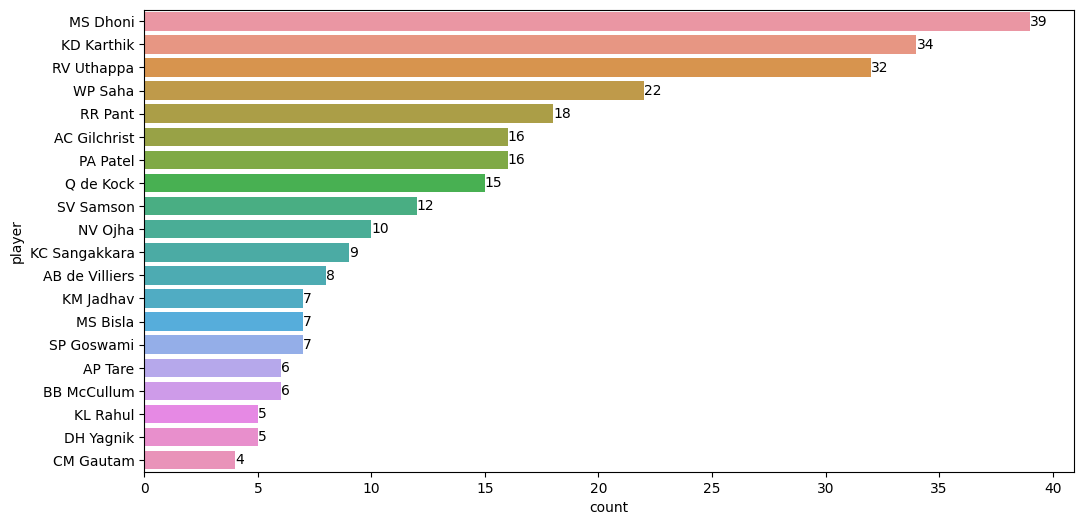

In [4343]:
plt.figure(figsize=(12, 6))
# plt.xticks(rotation=90)
ax = sns.barplot(data=f_df[f_df['kind'] == 'stumped'].nlargest(20, 'count'),x='count', y='player', orient='h')
ax.bar_label(ax.containers[0]);

In [4344]:
ipl_ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [4345]:
# batsmen_stats = ipl_ball_by_ball[['ID', 'batter']].value_counts().to_frame().reset_index().rename(columns={0: 'innings'}).groupby('batter')['innings'].count().to_frame()
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
batsmen_stats = ipl_ball_by_ball[innings_filt][['ID', 'batter', 'non-striker']].set_index('ID').stack().droplevel(1)\
.rename('innings').reset_index()

batsmen_stats = batsmen_stats[['ID', 'innings']].drop_duplicates()['innings'].value_counts().to_frame()

# batsmen_stats = batsmen_stats[['ID', 'batsmen']].value_counts().to_frame().reset_index().rename(columns={0: 'innings'}).groupby('batsmen')['innings'].count().to_frame()



In [4346]:
batsmen_stats

,innings
RG Sharma,222
V Kohli,215
KD Karthik,208
MS Dhoni,206
S Dhawan,205
...,...
KS Sharma,1
AR Bawne,1
S Randiv,1
DM Bravo,1


In [4347]:
ipl_ball_by_ball.groupby('ID')[['batter', 'non-striker']].value_counts()

ID       batter        non-striker      
335982   BB McCullum   SC Ganguly           22
                       RT Ponting           21
                       DJ Hussey            20
         RT Ponting    BB McCullum          20
         BB McCullum   Mohammad Hafeez      14
                                            ..
1312200  Shubman Gill  WP Saha               3
         R Parag       R Ashwin              2
                       M Prasidh Krishna     2
         JC Buttler    SO Hetmyer            1
         SO Hetmyer    JC Buttler            1
Length: 23688, dtype: int64

In [4348]:
ipl_ball_by_ball.sort_values(by=['ID', 'innings', 'overs', 'ballnumber']).drop_duplicates(subset=['ID'], keep='last')[['batter', 'non-striker']].melt()['value'].value_counts()

RA Jadeja        36
MS Dhoni         33
KD Karthik       28
YK Pathan        25
V Kohli          24
                 ..
Navdeep Saini     1
JDS Neesham       1
D Padikkal        1
GD Phillips       1
Tilak Varma       1
Name: value, Length: 408, dtype: int64

In [4349]:
ipl_ball_by_ball['ballnumber'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [4350]:
ipl_ball_by_ball[ipl_ball_by_ball['innings'] == 2].sort_values(by=['ID', 'overs', 'ballnumber'])\
.drop_duplicates(subset=['ID'], keep='last')[['batter' , 'non-striker']].melt()['value'].to_frame().value_counts()

value         
RA Jadeja         36
MS Dhoni          33
KD Karthik        26
YK Pathan         24
DA Miller         23
                  ..
Harpreet Singh     1
Harpreet Brar      1
RK Singh           1
Harmeet Singh      1
DP Vijaykumar      1
Length: 408, dtype: int64

In [4351]:
innings_one = ipl_ball_by_ball[(ipl_ball_by_ball['innings'] == 1)].sort_values(by=['ID', 'innings','overs', 'ballnumber'])\
.drop_duplicates(subset=['ID'], keep='last')

player_out_1 = innings_one['player_out'].value_counts()

innings_one = innings_one[['batter' , 'non-striker']].melt()['value'].to_frame().value_counts()\
.to_frame().reset_index().set_index('value').rename(columns={0:'not outs'})
innings_one

,not outs
value,
MS Dhoni,49
RA Jadeja,35
KA Pollard,34
DJ Bravo,24
PP Chawla,24
...,...
R Rampaul,1
JPR Scantlebury-Searles,1
BW Hilfenhaus,1


In [4352]:
player_out_1

R Parag              5
B Kumar              5
PP Ojha              5
EJG Morgan           4
AB Dinda             4
                    ..
R Ashwin             1
STR Binny            1
V Pratap Singh       1
RA Jadeja            1
Washington Sundar    1
Name: player_out, Length: 153, dtype: int64

In [4353]:
innings_two = ipl_ball_by_ball[(ipl_ball_by_ball['innings'] == 2)].sort_values(by=['ID', 'innings', 'overs', 'ballnumber'])\
.drop_duplicates(subset=['ID'], keep='last')

player_out_2 = innings_two['player_out'].value_counts()

innings_two = innings_two[['batter' , 'non-striker']].melt()['value'].to_frame().value_counts()\
.to_frame().reset_index().set_index('value').rename(columns={0:'not outs'})
innings_two

,not outs
value,
RA Jadeja,36
MS Dhoni,33
KD Karthik,26
YK Pathan,24
DA Miller,23
...,...
Harpreet Singh,1
Harpreet Brar,1
RK Singh,1


In [4354]:
innings_one = innings_one.merge(player_out_1.to_frame(), how='outer', left_index=True, right_index=True).fillna(0)
innings_one['not outs'] = innings_one['not outs'] - innings_one['player_out']
innings_one = innings_one.drop('player_out', axis=1)
innings_one

,not outs
A Ashish Reddy,6.0
A Badoni,1.0
A Chandila,2.0
A Choudhary,1.0
A Dananjaya,1.0
...,...
YS Chahal,5.0
YV Takawale,2.0
Yash Dayal,0.0
Yuvraj Singh,5.0


In [4355]:
innings_two = innings_two.merge(player_out_2.to_frame(), how='outer', left_index=True, right_index=True).fillna(0)
innings_two['not outs'] = innings_two['not outs'] - innings_two['player_out']
innings_two = innings_two.drop('player_out', axis=1)
innings_two

,not outs
A Ashish Reddy,2.0
A Badoni,2.0
A Choudhary,1.0
A Kumble,9.0
A Manohar,1.0
...,...
Y Venugopal Rao,5.0
YK Pathan,24.0
YS Chahal,8.0
Yuvraj Singh,10.0


In [4356]:
notouts = pd.merge(innings_two, innings_one, how='outer', left_index=True, right_index=True).fillna(0)
notouts

,not outs_x,not outs_y
A Ashish Reddy,2.0,6.0
A Badoni,2.0,1.0
A Chandila,0.0,2.0
A Choudhary,1.0,1.0
A Dananjaya,0.0,1.0
...,...,...
YS Chahal,8.0,5.0
YV Takawale,0.0,2.0
Yash Dayal,0.0,0.0
Yuvraj Singh,10.0,5.0


In [4357]:
def add_innings(not_outs_x, not_outs_y):
    return not_outs_x + not_outs_y

notouts['combined_notouts'] = np.vectorize(add_innings)(notouts['not outs_x'], notouts['not outs_y'])


In [4358]:
notouts = notouts.rename(columns={"not outs_x": "second_innings_notouts", "not outs_y": "first_innings_notouts"})

In [4359]:
notouts.shape

(493, 3)

In [4360]:
batsmen_stats.loc['AB de Villiers']

innings    170
Name: AB de Villiers, dtype: int64

In [4361]:
ipl_ball_by_ball['innings'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [4362]:
batsmen_stats.loc['MS Dhoni']

innings    206
Name: MS Dhoni, dtype: int64

In [4363]:
batsmen_stats = batsmen_stats.merge(notouts, how='outer', left_index=True, right_index=True)

In [4364]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts
A Ashish Reddy,23,2.0,6.0,8.0
A Badoni,11,2.0,1.0,3.0
A Chandila,2,0.0,2.0,2.0
A Chopra,6,NaN,NaN,NaN
A Choudhary,3,1.0,1.0,2.0
...,...,...,...,...
Yash Dayal,1,0.0,0.0,0.0
Yashpal Singh,4,NaN,NaN,NaN
Younis Khan,1,NaN,NaN,NaN
Yuvraj Singh,126,10.0,5.0,15.0


In [4365]:
# players with not a single not outs
ids = batsmen_stats.drop('innings', axis=1).isnull().all(1)
batsmen_stats[ids].nlargest(10, 'innings')

,innings,second_innings_notouts,first_innings_notouts,combined_notouts
PP Shaw,63,NaN,NaN,NaN
YBK Jaiswal,23,NaN,NaN,NaN
S Sohal,20,NaN,NaN,NaN
SA Asnodkar,20,NaN,NaN,NaN
UBT Chand,20,NaN,NaN,NaN
MS Wade,13,NaN,NaN,NaN
C Munro,12,NaN,NaN,NaN
MJ Lumb,12,NaN,NaN,NaN
AD Nath,10,NaN,NaN,NaN
N Saini,10,NaN,NaN,NaN


In [4366]:
ipl_ball_by_ball[['ID', 'batter']].value_counts().to_frame().reset_index().rename(columns={0: 'innings'}).groupby('batter')['innings'].count().to_frame()

,innings
batter,
A Ashish Reddy,23
A Badoni,11
A Chandila,2
A Chopra,6
A Choudhary,3
...,...
Yash Dayal,1
Yashpal Singh,4
Younis Khan,1


In [4367]:
# q = ipl_ball_by_ball[(ipl_ball_by_ball['innings'] == 2)].sort_values(by=['ID', 'innings', 'overs', 'ballnumber'])
# q = q.drop_duplicates(subset=['ID'], keep='last')

In [4368]:
0 - 10

-10

In [4369]:
ipl_ball_by_ball[['ID', 'batter']].value_counts().to_frame().reset_index().rename(columns={0: 'innings'}).groupby('batter')['innings'].count().to_frame()

,innings
batter,
A Ashish Reddy,23
A Badoni,11
A Chandila,2
A Chopra,6
A Choudhary,3
...,...
Yash Dayal,1
Yashpal Singh,4
Younis Khan,1


In [4370]:
g = ipl_ball_by_ball[['ID', 'batter', 'non-striker']].groupby('ID')

In [4371]:
# batsmen_stats = ipl_ball_by_ball[['ID', 'batter']].value_counts().to_frame().reset_index().rename(columns={0: 'innings'}).groupby('batter')['innings'].count().to_frame()

In [4372]:
balls_faced = ipl_ball_by_ball[(ipl_ball_by_ball['extra_type'].isin([np.nan, 'legbyes', 'noballs', 'penality', 'byes'])) \
                     & ipl_ball_by_ball['innings'].isin([1, 2])]['batter'].value_counts()

In [4373]:
batsmen_stats = batsmen_stats.merge(balls_faced.rename('balls_faced'), left_index=True, right_index=True, how='outer')

In [4374]:
batsmen_stats = batsmen_stats.fillna(0).astype(np.int64)

In [4375]:
batsmen_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, A Ashish Reddy to Z Khan
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   innings                 609 non-null    int64
 1   second_innings_notouts  609 non-null    int64
 2   first_innings_notouts   609 non-null    int64
 3   combined_notouts        609 non-null    int64
 4   balls_faced             609 non-null    int64
dtypes: int64(5)
memory usage: 28.5+ KB


In [4376]:
batsmen_stats.nlargest(20,'innings')

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced
RG Sharma,222,18,10,28,4526
V Kohli,215,22,10,32,5129
KD Karthik,208,26,19,45,3299
MS Dhoni,206,32,47,79,3682
S Dhawan,205,16,10,26,4942
SK Raina,200,20,10,30,4043
RV Uthappa,197,12,5,17,3799
AT Rayudu,175,14,16,30,3296
KA Pollard,171,21,31,52,2316
AB de Villiers,170,21,19,40,3403


In [4377]:
batsmen_runs = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([1, 2])].groupby('batter')['batsman_run'].sum()

In [4378]:
ipl_ball_by_ball.columns


Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [4379]:
batsmen_stats = batsmen_stats.merge(batsmen_runs.rename('total_runs'), left_index=True, right_index=True, how='outer')

In [4380]:
batsmen_stats = batsmen_stats.fillna(0).astype(np.int64)

In [4381]:
batsmen_stats.nlargest(20, 'total_runs')

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs
V Kohli,215,22,10,32,5129,6624
S Dhawan,205,16,10,26,4942,6244
DA Warner,162,13,9,22,4180,5881
RG Sharma,222,18,10,28,4526,5879
SK Raina,200,20,10,30,4043,5528
AB de Villiers,170,21,19,40,3403,5162
MS Dhoni,206,32,47,79,3682,4978
CH Gayle,141,11,5,16,3333,4965
RV Uthappa,197,12,5,17,3799,4952
KD Karthik,208,26,19,45,3299,4376


In [4382]:
round(6624 / (215-32),1)

36.2

In [4383]:
np.round((6624/5129) * 100, 2)

129.15

In [4384]:
highest_scores = ipl_ball_by_ball.groupby(['ID', 'batter'])['batsman_run'].sum().droplevel(0).sort_values().reset_index().drop_duplicates('batter', keep='last').set_index('batter')

In [4385]:
highest_scores

,batsman_run
batter,
S Lamichhane,0
Yash Dayal,0
V Pratap Singh,0
L Ablish,0
K Yadav,0
...,...
KL Rahul,132
AB de Villiers,133
Q de Kock,140


In [4386]:
batsmen_stats = batsmen_stats.merge(highest_scores.rename(columns={'batsman_run':'highest_score'}), left_index=True, right_index=True, how='outer')

In [4387]:
batsmen_stats = batsmen_stats.fillna(0).astype(np.int64)

In [4388]:
batsmen_stats.nlargest(20, 'highest_score')

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score
CH Gayle,141,11,5,16,3333,4965,175
BB McCullum,109,2,3,5,2186,2880,158
Q de Kock,92,4,2,6,2064,2764,140
AB de Villiers,170,21,19,40,3403,5162,133
KL Rahul,100,8,11,19,2855,3889,132
RR Pant,97,9,6,15,1918,2838,128
M Vijay,106,5,0,5,2149,2619,127
DA Warner,162,13,9,22,4180,5881,126
JC Buttler,81,7,3,10,1891,2831,124
V Sehwag,104,4,1,5,1754,2728,122


In [4389]:
batsmen_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, A Ashish Reddy to Z Khan
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   innings                 609 non-null    int64
 1   second_innings_notouts  609 non-null    int64
 2   first_innings_notouts   609 non-null    int64
 3   combined_notouts        609 non-null    int64
 4   balls_faced             609 non-null    int64
 5   total_runs              609 non-null    int64
 6   highest_score           609 non-null    int64
dtypes: int64(7)
memory usage: 38.1+ KB


In [4390]:
np.round((6624/5129) * 100, 2)

129.15

In [4391]:
# calculation of avg, sr
avg = np.round(batsmen_stats['total_runs'] / (batsmen_stats['innings'] - batsmen_stats['combined_notouts']), 2)
avg = avg.replace([np.inf, -np.inf, np.nan], 0)

sr = np.round((batsmen_stats['total_runs'] / batsmen_stats['balls_faced']) * 100, 2)
sr = sr.replace([np.nan], 0)

In [4392]:
batsmen_stats['average'] = avg
batsmen_stats['strike_rate'] = sr

In [4393]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08
A Badoni,11,2,1,3,130,161,54,20.12,123.85
A Chandila,2,0,2,2,7,4,4,0.00,57.14
A Chopra,6,0,0,0,71,53,24,8.83,74.65
A Choudhary,3,1,1,2,20,25,15,25.00,125.00
...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21
Younis Khan,1,0,0,0,7,3,3,3.00,42.86
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72


In [4394]:
y = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([1, 2])].groupby(['ID', 'batter'])['batsman_run'].sum().droplevel(0).sort_values()

In [4395]:
fifties = y[(y >= 50) & (y<100)].reset_index()['batter'].value_counts().rename('50s')

In [4396]:
hundreds = y[(y >= 100)].reset_index()['batter'].value_counts().rename('100s')

In [4397]:
batsmen_stats = batsmen_stats.merge(fifties, left_index=True, right_index=True, how='outer')
batsmen_stats = batsmen_stats.merge(hundreds, left_index=True, right_index=True, how='outer')

In [4398]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,NaN,NaN
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,NaN
A Chandila,2,0,2,2,7,4,4,0.00,57.14,NaN,NaN
A Chopra,6,0,0,0,71,53,24,8.83,74.65,NaN,NaN
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,NaN,NaN
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,NaN,NaN
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,NaN,NaN
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,NaN


In [4399]:
batsmen_stats = batsmen_stats.fillna(0)

In [4400]:
batsmen_stats.nlargest(10, '50s')

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s
DA Warner,162,13,9,22,4180,5881,126,42.01,140.69,55.0,4.0
S Dhawan,205,16,10,26,4942,6244,106,34.88,126.35,47.0,2.0
V Kohli,215,22,10,32,5129,6624,113,36.20,129.15,44.0,5.0
AB de Villiers,170,21,19,40,3403,5162,133,39.71,151.69,40.0,3.0
RG Sharma,222,18,10,28,4526,5879,109,30.30,129.89,40.0,1.0
SK Raina,200,20,10,30,4043,5528,100,32.52,136.73,39.0,1.0
G Gambhir,152,16,0,16,3404,4217,93,31.01,123.88,36.0,0.0
CH Gayle,141,11,5,16,3333,4965,175,39.72,148.96,31.0,6.0
KL Rahul,100,8,11,19,2855,3889,132,48.01,136.22,31.0,4.0
AM Rahane,148,11,5,16,3376,4074,105,30.86,120.68,28.0,2.0


In [4401]:
thirties = y[(y >= 30) & (y <= 49) ].reset_index()['batter'].value_counts().rename('30s')

In [4402]:
batsmen_stats = batsmen_stats.merge(thirties, left_index=True, right_index=True, how='outer')

In [4403]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,NaN
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,NaN
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,NaN
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,NaN
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,NaN
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,NaN
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0


In [4404]:
batsmen_stats.nlargest(10, '30s')

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s
V Kohli,215,22,10,32,5129,6624,113,36.20,129.15,44.0,5.0,47.0
RV Uthappa,197,12,5,17,3799,4952,88,27.51,130.35,27.0,0.0,45.0
RG Sharma,222,18,10,28,4526,5879,109,30.30,129.89,40.0,1.0,43.0
KD Karthik,208,26,19,45,3299,4376,97,26.85,132.65,20.0,0.0,40.0
MS Dhoni,206,32,47,79,3682,4978,84,39.20,135.20,24.0,0.0,40.0
S Dhawan,205,16,10,26,4942,6244,106,34.88,126.35,47.0,2.0,39.0
AT Rayudu,175,14,16,30,3296,4190,100,28.90,127.12,22.0,1.0,37.0
SK Raina,200,20,10,30,4043,5528,100,32.52,136.73,39.0,1.0,37.0
BB McCullum,109,2,3,5,2186,2880,158,27.69,131.75,13.0,2.0,29.0
RR Pant,97,9,6,15,1918,2838,128,34.61,147.97,15.0,1.0,28.0


In [4405]:
sixes = ipl_ball_by_ball[(ipl_ball_by_ball['innings'].isin([1, 2])) & (ipl_ball_by_ball['batsman_run'] == 6) & (ipl_ball_by_ball['non_boundary'] == 0)].groupby(['batter'])['batsman_run']\
.count().rename('6s')

In [4406]:
fours = ipl_ball_by_ball[(ipl_ball_by_ball['innings'].isin([1, 2])) & (ipl_ball_by_ball['batsman_run'] == 4) & (ipl_ball_by_ball['non_boundary'] == 0)].groupby(['batter'])['batsman_run']\
.count().rename('4s')

In [4407]:
batsmen_stats = batsmen_stats.merge(sixes, left_index=True, right_index=True, how='outer')
batsmen_stats = batsmen_stats.merge(fours, left_index=True, right_index=True, how='outer')

In [4408]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,NaN,7.0,11.0
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,NaN,NaN,NaN
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,NaN,NaN,7.0
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,NaN,NaN,NaN
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,NaN,NaN,5.0
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,NaN,NaN,NaN
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0


In [4409]:
batsmen_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, A Ashish Reddy to Z Khan
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   innings                 609 non-null    int64  
 1   second_innings_notouts  609 non-null    int64  
 2   first_innings_notouts   609 non-null    int64  
 3   combined_notouts        609 non-null    int64  
 4   balls_faced             609 non-null    int64  
 5   total_runs              609 non-null    int64  
 6   highest_score           609 non-null    int64  
 7   average                 609 non-null    float64
 8   strike_rate             609 non-null    float64
 9   50s                     609 non-null    float64
 10  100s                    609 non-null    float64
 11  30s                     256 non-null    float64
 12  6s                      400 non-null    float64
 13  4s                      484 non-null    float64
dtypes: float64(7), int64(7)
memory 

In [4410]:
batsmen_stats = batsmen_stats.fillna(0)

In [4411]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,0.0,7.0,11.0
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,0.0,0.0,0.0
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,0.0,0.0,7.0
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,0.0,0.0,5.0
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,0.0,0.0,0.0
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0


In [4412]:
y = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([1, 2])].groupby(['ID', 'batter'])[['batsman_run', 'isWicketDelivery']].sum().droplevel(0)

In [4413]:
# ro = ipl_ball_by_ball[(ipl_ball_by_ball['innings'].isin([1, 2]))]\
# .groupby(['ID', 'batter'])\
# [['batsman_run', 'isWicketDelivery', 'kind']].agg({"batsman_run": 'sum', 'isWicketDelivery':'last', 'kind': 'last'}).droplevel(0)
# ro['isWicketDelivery'].unique()

In [4414]:
def get_runout_player(batter, player_out):
    if batter != player_out:
        return player_out
    return player_out

In [4415]:
ducks = ipl_ball_by_ball[(ipl_ball_by_ball['innings'].isin([1, 2]))]\
.groupby(['ID', 'batter']).agg({"batsman_run": 'sum', 'isWicketDelivery':'last', 'kind': 'last', 'player_out': 'last'}).droplevel(0).reset_index()
ducks = ducks[ducks['batsman_run'] == 0].replace([None], 'not-out')
ducks = ducks[~(ducks['kind'].isin(['not-out'])) ]['player_out'].value_counts()

In [4416]:
# some issues with addition of runout ducks, someone fix it for me please
ducks.reset_index()

,index,player_out
0,PA Patel,13
1,Mandeep Singh,13
2,RG Sharma,13
3,KD Karthik,13
4,Rashid Khan,12
...,...,...
357,ML Hayden,1
358,I Sharma,1
359,AD Nath,1
360,YS Chahal,1


In [4417]:
# bowling stats

In [4418]:
bowling_stats = ipl_ball_by_ball[ipl_ball_by_ball['innings'].isin([1, 2])][['ID', 'bowler']]\
.drop_duplicates(subset=['ID', 'bowler'])['bowler'].value_counts().rename('bowl_innings').to_frame()

#.to_frame() #.stack().droplevel(1).rename('innings').reset_index()
# batsmen_stats = batsmen_stats[['ID', 'innings']].drop_duplicates()['innings'].value_counts().to_frame()

In [4419]:
bowling_stats

,bowl_innings
RA Jadeja,181
R Ashwin,181
PP Chawla,164
Harbhajan Singh,160
DJ Bravo,158
...,...
AA Kazi,1
P Ray Barman,1
S Midhun,1
AM Rahane,1


In [4420]:
# BALLS BOWLED

In [4421]:
ipl_ball_by_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [4422]:
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'legbyes', 'byes']) )
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))

In [4423]:
balls_bowled = ipl_ball_by_ball[to_include_filt & innings_filt][['ID', 'bowler']]['bowler'].value_counts().rename('balls_bowled').to_frame()

In [4424]:
balls_bowled

,balls_bowled
R Ashwin,3900
SP Narine,3457
Harbhajan Singh,3416
PP Chawla,3274
B Kumar,3262
...,...
SN Khan,2
SPD Smith,2
DA Warner,1
YBK Jaiswal,1


In [4425]:
bowling_stats = bowling_stats.merge(balls_bowled, left_index=True, right_index=True, how='inner')

In [4426]:
bowling_stats

,bowl_innings,balls_bowled
RA Jadeja,181,3205
R Ashwin,181,3900
PP Chawla,164,3274
Harbhajan Singh,160,3416
DJ Bravo,158,3120
...,...,...
AA Kazi,1,12
P Ray Barman,1,24
S Midhun,1,12
AM Rahane,1,6


In [4427]:
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs']) )

In [4428]:
runs_given = ipl_ball_by_ball[to_include_filt & innings_filt][['ID', 'bowler', 'total_run']].groupby('bowler')['total_run'].sum()\
.rename('runs_given').to_frame()

In [4429]:
runs_given

,runs_given
bowler,
A Ashish Reddy,396
A Badoni,11
A Chandila,242
A Choudhary,144
A Dananjaya,47
...,...
YK Pathan,1415
YS Chahal,3624
Yash Dayal,296


In [4430]:
bowling_stats = bowling_stats.merge(runs_given, left_index=True, right_index=True, how='inner')

In [4431]:
bowling_stats.loc['JJ Bumrah']

C:\Users\Moham\Desktop\dev\projects\india\env\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


bowl_innings     120
balls_bowled    2742
runs_given      3379
Name: JJ Bumrah, dtype: int64

In [4432]:
# bowling_stats.index.tolist()
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
# to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan]) )
is_wicket_filt = (ipl_ball_by_ball['isWicketDelivery'] == 1)
kind_filt = ~(ipl_ball_by_ball['kind'].isin(['run out']))

In [4433]:
wickets = ipl_ball_by_ball[is_wicket_filt & innings_filt & kind_filt][['ID', 'bowler', 'player_out']].groupby('bowler')['player_out'].count()\
.rename('wickets').to_frame()

In [4434]:
wickets

,wickets
bowler,
A Ashish Reddy,18
A Badoni,2
A Chandila,11
A Choudhary,5
A Flintoff,2
...,...
YK Pathan,42
YS Chahal,166
Yash Dayal,11


In [4435]:
bowling_stats = bowling_stats.merge(wickets, left_index=True, right_index=True, how='outer')

In [4436]:
bowling_stats = bowling_stats.fillna(0)

In [4437]:
bowling_stats.nlargest(20, 'wickets')

,bowl_innings,balls_bowled,runs_given,wickets
DJ Bravo,158,3120,4360,183.0
SL Malinga,122,2827,3364,170.0
A Mishra,154,3245,3976,166.0
YS Chahal,130,2856,3624,166.0
PP Chawla,164,3274,4301,157.0
R Ashwin,181,3900,4534,157.0
B Kumar,146,3262,3971,154.0
SP Narine,147,3457,3820,152.0
Harbhajan Singh,160,3416,4030,150.0
JJ Bumrah,120,2742,3379,145.0


In [4438]:
economy = (np.round(bowling_stats['runs_given'] / (bowling_stats['balls_bowled'] / 6), 2)).rename('economy').to_frame()

In [4439]:
economy.nsmallest(20, 'economy')

,economy
AC Gilchrist,0.00
NB Singh,3.75
Sachin Baby,4.80
AM Rahane,5.00
A Badoni,5.50
DJ Thornely,5.71
Mohsin Khan,5.97
LA Carseldine,6.00
M Manhas,6.00
SS Mundhe,6.00


In [4440]:
bowling_stats = bowling_stats.merge(economy, left_index=True, right_index=True, how='outer')

In [4441]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy
A Ashish Reddy,20,262,396,18.0,9.07
A Badoni,2,12,11,2.0,5.50
A Chandila,12,234,242,11.0,6.21
A Choudhary,5,101,144,5.0,8.55
A Dananjaya,1,24,47,0.0,11.75
...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40
YS Chahal,130,2856,3624,166.0,7.61
Yash Dayal,9,192,296,11.0,9.25
Yuvraj Singh,73,869,1077,36.0,7.44


In [4442]:
bowl_average = (np.round(bowling_stats['runs_given'] / (bowling_stats['wickets']), 2)).rename('bowl_avg').to_frame()

In [4443]:
bowl_average

,bowl_avg
A Ashish Reddy,22.00
A Badoni,5.50
A Chandila,22.00
A Choudhary,28.80
A Dananjaya,inf
...,...
YK Pathan,33.69
YS Chahal,21.83
Yash Dayal,26.91
Yuvraj Singh,29.92


In [4444]:
bowling_stats = bowling_stats.merge(bowl_average, left_index=True, right_index=True, how='outer').replace([np.inf], 0)

In [4445]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg
A Ashish Reddy,20,262,396,18.0,9.07,22.00
A Badoni,2,12,11,2.0,5.50,5.50
A Chandila,12,234,242,11.0,6.21,22.00
A Choudhary,5,101,144,5.0,8.55,28.80
A Dananjaya,1,24,47,0.0,11.75,0.00
...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69
YS Chahal,130,2856,3624,166.0,7.61,21.83
Yash Dayal,9,192,296,11.0,9.25,26.91
Yuvraj Singh,73,869,1077,36.0,7.44,29.92


In [4446]:
bowl_strikerate = (np.round(bowling_stats['balls_bowled'] / (bowling_stats['wickets']), 2)).rename('bowl_sr').to_frame().replace([np.inf], 0)

In [4447]:
bowling_stats = bowling_stats.merge(bowl_strikerate, left_index=True, right_index=True, how='outer')

In [4448]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56
A Badoni,2,12,11,2.0,5.50,5.50,6.00
A Chandila,12,234,242,11.0,6.21,22.00,21.27
A Choudhary,5,101,144,5.0,8.55,28.80,20.20
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00
...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14


In [4449]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs']) )
# kind_filt = ~( ipl_ball_by_ball['kind'].isin(['run out']) )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )

In [4450]:
def convert_to_na(row):
    if row['kind'] == 'run out':
        row['player_out'] = np.nan
    return row

In [4451]:
best_figures = ipl_ball_by_ball[to_include_filt & innings_filt & kind_filt]
# effeciency needed in this apply method i used currently takes atleast 15s to fully apply the function maybe using loc slice assignment might help?
# best_figures = best_figures.apply(convert_to_na, axis=1)

# hack for including run-out runs but excluding wickets taken during the run out delivery
best_figures.loc[best_figures['kind'] == 'run out', 'player_out'] = np.nan

best_figures = best_figures[['ID', 'bowler', 'total_run', 'player_out']]\
.groupby(['ID', 'bowler']).agg({'total_run': 'sum', 'player_out': 'count'})\
.droplevel(0)\
.sort_values(by=['player_out', 'total_run'], ascending=[True, False]).reset_index()\
.drop_duplicates(subset=['bowler'], keep='last').set_index('bowler')


In [4452]:
def convert_to_bowling_fig(player_out, total_run):
    return f"{player_out}/{total_run}"

best_figures['BBI'] = np.vectorize(convert_to_bowling_fig)(best_figures['player_out'], best_figures['total_run'])

In [4453]:
best_figures.nlargest(20, 'player_out')

,total_run,player_out,BBI
bowler,,,
A Zampa,19,6,6/19
Sohail Tanvir,14,6,6/14
AS Joseph,12,6,6/12
YS Chahal,40,5,5/40
Arshdeep Singh,32,5,5/32
HV Patel,27,5,5/27
AD Mascarenhas,25,5,5/25
JD Unadkat,25,5,5/25
Umran Malik,25,5,5/25


In [4454]:
ipl_ball_by_ball['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [4455]:
ipl_matches[(ipl_matches['MatchNumber'] == '16') & (ipl_matches['Season'] == '2011')]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
759,501213,Mumbai,2011-04-17,2011,16,Pune Warriors,Delhi Daredevils,Dr DY Patil Sports Academy,Delhi Daredevils,field,N,Delhi Daredevils,Wickets,3.0,NaN,Yuvraj Singh,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvraj S...","['DA Warner', 'V Sehwag', 'IK Pathan', 'NV Ojh...",Asad Rauf,AM Saheba


In [4456]:
ipl_ball_by_ball[(ipl_ball_by_ball['ID'] == 501213) & (ipl_ball_by_ball['bowler'] == 'Yuvraj Singh') ]

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
180738,501213,2,12,1,NV Ojha,Yuvraj Singh,IK Pathan,NaN,1,0,1,0,0,NaN,NaN,NaN,Delhi Daredevils
180739,501213,2,12,2,IK Pathan,Yuvraj Singh,NV Ojha,NaN,0,0,0,0,0,NaN,NaN,NaN,Delhi Daredevils
180740,501213,2,12,3,IK Pathan,Yuvraj Singh,NV Ojha,NaN,0,0,0,0,1,IK Pathan,caught,SB Wagh,Delhi Daredevils
180741,501213,2,12,4,NV Ojha,Yuvraj Singh,MS Wade,NaN,0,0,0,0,1,NV Ojha,stumped,RV Uthappa,Delhi Daredevils
180742,501213,2,12,5,Y Venugopal Rao,Yuvraj Singh,MS Wade,NaN,0,0,0,0,0,NaN,NaN,NaN,Delhi Daredevils
180743,501213,2,12,6,Y Venugopal Rao,Yuvraj Singh,MS Wade,NaN,0,0,0,0,0,NaN,NaN,NaN,Delhi Daredevils
180750,501213,2,14,1,Y Venugopal Rao,Yuvraj Singh,AJ Finch,NaN,0,0,0,0,0,NaN,NaN,NaN,Delhi Daredevils
180751,501213,2,14,2,Y Venugopal Rao,Yuvraj Singh,AJ Finch,NaN,6,0,6,0,0,NaN,NaN,NaN,Delhi Daredevils
180752,501213,2,14,3,Y Venugopal Rao,Yuvraj Singh,AJ Finch,NaN,1,0,1,0,0,NaN,NaN,NaN,Delhi Daredevils
180753,501213,2,14,4,AJ Finch,Yuvraj Singh,Y Venugopal Rao,NaN,1,0,1,0,0,NaN,NaN,NaN,Delhi Daredevils


In [4457]:
t = ipl_ball_by_ball[to_include_filt & innings_filt & kind_filt]

# [['ID', 'bowler', 'total_run', 'player_out']]\
# .groupby(['ID', 'bowler']).agg({'total_run': 'sum', 'player_out': 'count'})\
# .droplevel(0)\
# .sort_values(by=['player_out', 'total_run']).reset_index()
# .drop_duplicates(subset=['bowler'], keep='last').set_index('bowler')

In [4458]:
# def convert_to_na(row):
#     if row['kind'] == 'run out':
#         row['player_out'] = np.nan
#     return row

# t.apply(convert_to_na, axis=1)

# np.vectorize(convert_to_na)(t)

In [4459]:
ipl_ball_by_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [4460]:
best_figures

,total_run,player_out,BBI
bowler,,,
MG Neser,62,0,0/62
Mashrafe Mortaza,58,0,0/58
P Ray Barman,56,0,0/56
MA Wood,49,0,0/49
Sunny Gupta,47,0,0/47
...,...,...,...
JJ Bumrah,10,5,5/10
A Kumble,5,5,5/5
A Zampa,19,6,6/19


In [4461]:
bowling_stats = bowling_stats.merge(best_figures[['BBI']], how='outer', left_index=True, right_index=True)

In [4462]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47
...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29


In [4463]:
# d = ipl_ball_by_ball[(ipl_ball_by_ball['innings'].isin([1, 2]))]\
# .groupby(['ID', 'batter'])
# # .agg({"batsman_run": 'sum', 'player_out': 'last', 'kind': 'last'}).reset_index()

# # grp_d = d.groupby('ID')
# g = d.apply(lambda g: d[''])

In [4464]:
ipl_matches[ipl_matches['ID'] == 336008]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
923,336008,Mumbai,2008-05-07,2007/08,27,Mumbai Indians,Rajasthan Royals,Dr DY Patil Sports Academy,Mumbai Indians,field,N,Mumbai Indians,Wickets,7.0,NaN,A Nehra,"['YV Takawale', 'ST Jayasuriya', 'RV Uthappa',...","['GC Smith', 'SA Asnodkar', 'YK Pathan', 'SR W...",DJ Harper,RE Koertzen


In [4465]:
ipl_ball_by_ball[(ipl_ball_by_ball['ID'] == 336008) & (ipl_ball_by_ball['batter'] == 'MM Patel')]

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
219690,336008,1,15,6,MM Patel,A Nehra,SK Trivedi,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [4466]:
# counter = 0
# for name, grp in grp_d:
#     print()
#     print(grp[grp['kind'].isna()])
#     print()
#     counter += 1
#     if counter == 200:
#         break
    

In [4467]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47
...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29


In [4468]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs']) )
# kind_filt = ~( ipl_ball_by_ball['kind'].isin(['run out']) )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') )
 # & (ipl_ball_by_ball['total_run'] == 0)

In [4469]:
wickets_counter = ipl_ball_by_ball[to_include_filt & innings_filt & kind_filt]

# wickets_counter.loc[wickets_counter['kind'] == 'run out', 'player_out'] = np.nan

In [4470]:
wickets_counter = wickets_counter[['ID', 'bowler', 'player_out']]\
.groupby(['ID', 'bowler']).agg({'player_out': 'count'})\
.droplevel(0).reset_index().groupby('bowler')['player_out'].value_counts()\
.rename('wickets').reset_index().rename(columns={'player_out':'haul'})
# .sort_values(by=['player_out', 'total_run'], ascending=[True, False]).reset_index()\
# .drop_duplicates(subset=['bowler'], keep='last').set_index('bowler')

In [4471]:
three_wicket_hauls = wickets_counter[wickets_counter['haul'] == 3].set_index('bowler').drop('haul', axis=1)

In [4472]:
three_wicket_hauls = three_wicket_hauls.rename(columns={'wickets': '3w'})

In [4473]:
ipl_ball_by_ball['extra_type'].unique()

array([nan, 'legbyes', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [4474]:
wickets_counter[wickets_counter['bowler'] == 'SL Malinga']

,bowler,haul,wickets
1218,SL Malinga,1,39
1219,SL Malinga,2,33
1220,SL Malinga,0,31
1221,SL Malinga,3,12
1222,SL Malinga,4,6
1223,SL Malinga,5,1


In [4475]:
wickets_counter[wickets_counter['bowler'] == 'JJ Bumrah']

,bowler,haul,wickets
544,JJ Bumrah,0,42
545,JJ Bumrah,1,34
546,JJ Bumrah,2,25
547,JJ Bumrah,3,16
548,JJ Bumrah,4,2
549,JJ Bumrah,5,1


In [4476]:
wickets_counter[wickets_counter['bowler'] == 'YS Chahal']

,bowler,haul,wickets
1452,YS Chahal,1,52
1453,YS Chahal,2,32
1454,YS Chahal,0,31
1455,YS Chahal,3,11
1456,YS Chahal,4,3
1457,YS Chahal,5,1


In [4477]:
wickets_counter[wickets_counter['bowler'] == 'DJ Bravo']

,bowler,haul,wickets
328,DJ Bravo,1,55
329,DJ Bravo,0,48
330,DJ Bravo,2,39
331,DJ Bravo,3,14
332,DJ Bravo,4,2


In [4478]:
bowling_stats = bowling_stats.merge(three_wicket_hauls, left_index=True, right_index=True, how='outer').fillna(0)


In [4479]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25,1.0
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5,0.0
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13,0.0
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17,0.0
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47,0.0
...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20,3.0
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40,11.0
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40,1.0
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29,2.0


In [4480]:
four_wicket_hauls = wickets_counter[wickets_counter['haul'] == 4].set_index('bowler').drop('haul', axis=1).rename(columns={'wickets': '4w'})
five_wicket_hauls = wickets_counter[wickets_counter['haul'] == 5].set_index('bowler').drop('haul', axis=1).rename(columns={'wickets': '5w'})
zero_wickets_hauls = wickets_counter[wickets_counter['haul'] == 0].set_index('bowler').drop('haul', axis=1).rename(columns={'wickets': '0w'})

In [4481]:
wickets_counter[wickets_counter['haul'] == 6].set_index('bowler').drop('haul', axis=1).rename(columns={'wickets': '6w'})

,6w
bowler,
A Zampa,1
AS Joseph,1
Sohail Tanvir,1


In [4482]:
bowling_stats =bowling_stats.merge(four_wicket_hauls, left_index=True, right_index=True, how='outer')\
.merge(five_wicket_hauls, left_index=True, right_index=True, how='outer')\
.merge(zero_wickets_hauls, left_index=True, right_index=True, how='outer').fillna(0)

In [4483]:
bowling_stats['pct_of_getting_wicket_each_match'] = np.round((bowling_stats['bowl_innings'] - bowling_stats['0w']) / bowling_stats['bowl_innings']\
.replace([np.inf], 0) * 100, 2)

In [4484]:
bowling_stats[bowling_stats['bowl_innings'] >= 20].nlargest(5, 'pct_of_getting_wicket_each_match')

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,5w,0w,pct_of_getting_wicket_each_match
A Nortje,30,682,916,43.0,8.06,21.30,15.86,3/33,3.0,0.0,0.0,5.0,83.33
CR Woakes,21,440,658,30.0,8.97,21.93,14.67,3/6,3.0,0.0,0.0,4.0,80.95
K Rabada,63,1429,1965,99.0,8.25,19.85,14.43,4/21,5.0,6.0,0.0,12.0,80.95
Rashid Khan,92,2195,2333,112.0,6.38,20.83,19.60,4/24,11.0,1.0,0.0,20.0,78.26
DE Bollinger,27,576,693,38.0,7.22,18.24,15.16,4/13,3.0,1.0,0.0,6.0,77.78


In [4485]:
bowling_stats.nlargest(5, 'wickets')

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,5w,0w,pct_of_getting_wicket_each_match
DJ Bravo,158,3120,4360,183.0,8.38,23.83,17.05,4/22,14.0,2.0,0.0,48.0,69.62
SL Malinga,122,2827,3364,170.0,7.14,19.79,16.63,5/13,12.0,6.0,1.0,31.0,74.59
A Mishra,154,3245,3976,166.0,7.35,23.95,19.55,5/17,12.0,4.0,1.0,55.0,64.29
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40,11.0,3.0,1.0,31.0,76.15
PP Chawla,164,3274,4301,157.0,7.88,27.39,20.85,4/17,10.0,2.0,0.0,59.0,64.02


In [4486]:
# wickets in pp, mo, death
# batting as above
# innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
# to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs']) )
# kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') )

In [4487]:
# wickets_counter_with_overs = ipl_ball_by_ball[to_include_filt & innings_filt & kind_filt]

In [4488]:
# wickets_counter_with_overs = wickets_counter_with_overs[['ID', 'bowler', 'player_out', 'overs']]\
# .groupby(['ID', 'bowler']).agg({'player_out': 'count', 'overs':'last'})
# # .droplevel(0)

# .groupby('bowler')['player_out'].value_counts()\
# .rename('wickets').reset_index().rename(columns={'player_out':'haul'})


In [4489]:
# w = wickets_counter_with_overs.droplevel(0).reset_index()
# w[(w['bowler'] == 'B Kumar') & ((w['overs'] >= 0) & ((w['overs'] <= 5)))]

In [4490]:
# powerplay_wickets = wickets_counter_with_overs[wickets_counter_with_overs['overs'].between(1, 6)]

In [4491]:
# powerplay_wickets[powerplay_wickets['bowler'] == 'B Kumar']

In [4492]:
# powerplay_wickets.groupby('bowler')

In [4493]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
# kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )
over_filt = (ipl_ball_by_ball['overs'].between(0, 5))

In [4494]:
wickets_counter_powerplay = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4495]:
runs_given_in_powerplay = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4496]:
runs_given_in_powerplay.loc[runs_given_in_powerplay['kind'] == 'run out', 'player_out'] = np.nan
runs_given_in_powerplay.loc[runs_given_in_powerplay['extra_type'] == 'legbyes', 'total_run'] = np.nan
runs_given_in_powerplay.loc[runs_given_in_powerplay['extra_type'] == 'byes', 'total_run'] = np.nan
runs_given_in_powerplay.loc[runs_given_in_powerplay['extra_type'].isin(['wides', 'noballs']), 'innings'] = np.nan
runs_given_in_powerplay = runs_given_in_powerplay[['ID', 'bowler', 'total_run', 'player_out', 'innings']]\
.groupby(['ID', 'bowler']).agg({'total_run': ['sum'], 'innings':'count', 'player_out': 'count'}).droplevel(0).reset_index()

In [4497]:
runs_given_in_powerplay.columns = ['bowler', 'runs_given_in_pp', 'balls_bowled_in_pp', 'wickets_taken_in_pp']

In [4498]:
runs_given_in_powerplay = runs_given_in_powerplay.groupby('bowler').sum()

In [4499]:
wickets_counter_powerplay = wickets_counter_powerplay[['ID', 'bowler', 'player_out']]\
.groupby(['ID', 'bowler']).agg({'player_out': 'count'})\
.droplevel(0).reset_index().groupby('bowler')['player_out'].value_counts()\
.rename('times').reset_index().rename(columns={'player_out':'haul'})

In [4500]:
wickets_counter_powerplay['wickets'] = wickets_counter_powerplay['haul'] * wickets_counter_powerplay['times']

In [4501]:
wickets_taken_powerplay = wickets_counter_powerplay.groupby('bowler')['wickets'].sum().to_frame()

In [4502]:
wickets_taken_powerplay.loc['Sandeep Sharma']

wickets    56
Name: Sandeep Sharma, dtype: int64

In [4503]:
bowling_stats.loc['Sandeep Sharma']

bowl_innings                          104
balls_bowled                         2318
runs_given                           3002
wickets                             114.0
economy                              7.77
bowl_avg                            26.33
bowl_sr                             20.33
BBI                                  4/20
3w                                    9.0
4w                                    2.0
5w                                    0.0
0w                                   33.0
pct_of_getting_wicket_each_match    68.27
Name: Sandeep Sharma, dtype: object

In [4504]:
bowling_stats = bowling_stats.merge(runs_given_in_powerplay, how='left', left_index=True, right_index=True).fillna(0)

In [4505]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,5w,0w,pct_of_getting_wicket_each_match,runs_given_in_pp,balls_bowled_in_pp,wickets_taken_in_pp
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25,1.0,0.0,0.0,6.0,70.00,20.0,6.0,0.0
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5,0.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13,0.0,1.0,0.0,6.0,50.00,137.0,144.0,10.0
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17,0.0,0.0,0.0,1.0,80.00,46.0,36.0,3.0
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47,0.0,0.0,0.0,1.0,0.00,12.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20,3.0,0.0,0.0,54.0,34.15,395.0,354.0,14.0
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40,11.0,3.0,1.0,31.0,76.15,514.0,386.0,16.0
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40,1.0,0.0,0.0,2.0,77.78,140.0,90.0,5.0
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29,2.0,2.0,0.0,52.0,28.77,0.0,0.0,0.0


In [4506]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
# kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )
over_filt = (ipl_ball_by_ball['overs'].between(6, 14))

In [4507]:
wickets_counter_middleovers = ipl_ball_by_ball[to_include_filt & innings_filt  & over_filt]

In [4508]:
runs_given_in_middleovers = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4509]:
runs_given_in_middleovers.loc[runs_given_in_middleovers['kind'] == 'run out', 'player_out'] = np.nan
runs_given_in_middleovers.loc[runs_given_in_middleovers['extra_type'] == 'legbyes', 'total_run'] = np.nan
runs_given_in_middleovers.loc[runs_given_in_middleovers['extra_type'] == 'byes', 'total_run'] = np.nan
runs_given_in_middleovers.loc[runs_given_in_middleovers['extra_type'].isin(['wides', 'noballs']), 'innings'] = np.nan
runs_given_in_middleovers = runs_given_in_middleovers[['ID', 'bowler', 'total_run', 'player_out', 'innings']]\
.groupby(['ID', 'bowler']).agg({'total_run': ['sum'], 'innings': 'count', 'player_out': 'count'}).droplevel(0).reset_index()

In [4510]:
runs_given_in_middleovers.columns = ['bowler', 'runs_given_in_mo', 'balls_bowled_in_mo', 'wickets_taken_in_mo']

In [4511]:
runs_given_in_middleovers = runs_given_in_middleovers.groupby('bowler').sum()

In [4512]:
wickets_counter_middleovers = wickets_counter_middleovers[['ID', 'bowler', 'player_out']]\
.groupby(['ID', 'bowler']).agg({'player_out': 'count'})\
.droplevel(0).reset_index().groupby('bowler')['player_out'].value_counts()\
.rename('times').reset_index().rename(columns={'player_out':'haul'})

In [4513]:
wickets_counter_middleovers['wickets'] = wickets_counter_middleovers['haul'] * wickets_counter_middleovers['times']
wickets_counter_middleovers = wickets_counter_middleovers.groupby('bowler')['wickets'].sum().to_frame()

In [4514]:
wickets_counter_middleovers

,wickets
bowler,
A Ashish Reddy,8
A Badoni,2
A Chandila,1
A Choudhary,1
A Dananjaya,0
...,...
YK Pathan,27
YS Chahal,110
Yash Dayal,3


In [4515]:
bowling_stats = bowling_stats.merge(runs_given_in_middleovers, how='left', left_index=True, right_index=True).fillna(0)

In [4516]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,5w,0w,pct_of_getting_wicket_each_match,runs_given_in_pp,balls_bowled_in_pp,wickets_taken_in_pp,runs_given_in_mo,balls_bowled_in_mo,wickets_taken_in_mo
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25,1.0,0.0,0.0,6.0,70.00,20.0,6.0,0.0,209.0,155.0,7.0
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5,0.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0,11.0,12.0,2.0
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13,0.0,1.0,0.0,6.0,50.00,137.0,144.0,10.0,99.0,84.0,1.0
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17,0.0,0.0,0.0,1.0,80.00,46.0,36.0,3.0,58.0,41.0,1.0
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47,0.0,0.0,0.0,1.0,0.00,12.0,6.0,0.0,35.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20,3.0,0.0,0.0,54.0,34.15,395.0,354.0,14.0,896.0,714.0,25.0
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40,11.0,3.0,1.0,31.0,76.15,514.0,386.0,16.0,2437.0,2025.0,107.0
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40,1.0,0.0,0.0,2.0,77.78,140.0,90.0,5.0,76.0,48.0,3.0
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29,2.0,2.0,0.0,52.0,28.77,0.0,0.0,0.0,925.0,756.0,30.0


In [4517]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
# kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )
over_filt = (ipl_ball_by_ball['overs'].between(15, 19))

In [4518]:
wickets_counter_death = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4519]:
runs_given_in_death = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4520]:
# runs_given_in_death = runs_given_in_death[['ID', 'bowler', 'total_run']]\
# .groupby(['ID', 'bowler']).agg({'total_run': ['sum', 'count']}).droplevel(0).reset_index()
runs_given_in_death.loc[runs_given_in_death['kind'] == 'run out', 'player_out'] = np.nan
runs_given_in_death.loc[runs_given_in_death['extra_type'] == 'legbyes', 'total_run'] = np.nan
runs_given_in_death.loc[runs_given_in_death['extra_type'] == 'byes', 'total_run'] = np.nan
# runs_given_in_death.loc[runs_given_in_death['kind'] == 'run out', 'player_out'] = np.nan
runs_given_in_death.loc[runs_given_in_death['extra_type'].isin(['wides', 'noballs']), 'innings'] = np.nan
runs_given_in_death = runs_given_in_death[['ID', 'bowler', 'total_run', 'player_out', 'innings']]\
.groupby(['ID', 'bowler']).agg({'total_run': ['sum'], 'innings': 'count', 'player_out': 'count'}).droplevel(0).reset_index()

In [4521]:
runs_given_in_death.columns = ['bowler', 'runs_given_in_death', 'balls_bowled_in_death', 'wickets_taken_in_death']

In [4522]:
# runs_given_in_death.columns = ['bowler', 'runs_given', 'balls_bowled']

In [4523]:
runs_given_in_death = runs_given_in_death.groupby('bowler').sum()

In [4524]:
runs_given_in_death.loc['DL Chahar']

runs_given_in_death       174.0
balls_bowled_in_death     129.0
wickets_taken_in_death     12.0
Name: DL Chahar, dtype: float64

In [4525]:
wickets_counter_death = wickets_counter_death[['ID', 'bowler', 'player_out']]\
.groupby(['ID', 'bowler']).agg({'player_out': 'count'})\
.droplevel(0).reset_index().groupby('bowler')['player_out'].value_counts()\
.rename('times').reset_index().rename(columns={'player_out':'haul'})

In [4526]:
wickets_counter_death['wickets'] = wickets_counter_death['haul'] * wickets_counter_death['times']
wickets_counter_death = wickets_counter_death.groupby('bowler')['wickets'].sum().to_frame()

In [4527]:
wickets_counter_death.nlargest(10, 'wickets')

,wickets
bowler,
DJ Bravo,130
SL Malinga,122
B Kumar,95
JJ Bumrah,90
SP Narine,77
Mohammed Shami,68
CH Morris,64
A Nehra,63
UT Yadav,63


In [4528]:
bowling_stats = bowling_stats.merge(runs_given_in_death, how='left', left_index=True, right_index=True).fillna(0)

In [4529]:
ipl_ball_by_ball['kind'].unique()

array([nan, 'caught', 'caught and bowled', 'run out', 'bowled', 'stumped',
       'lbw', 'hit wicket', 'retired hurt', 'retired out',
       'obstructing the field'], dtype=object)

In [4530]:
# economy = (np.round(bowling_stats['runs_given'] / (bowling_stats['balls_bowled'] / 6), 2)).rename('economy').to_frame()

In [4531]:
# runs_given_in_powerplay['']
# (np.round(runs_given_in_powerplay['runs_given_in_death'] / (bowling_stats['balls_bowled'] / 6), 2)).rename('economy').to_frame()

In [4532]:
e = ipl_ball_by_ball[to_include_filt & innings_filt & kind_filt & over_filt]

In [4533]:
e = e[['ID', 'bowler', 'total_run', 'player_out']]\
.groupby(['ID', 'bowler']).agg({'total_run': ['sum', 'count'], 'player_out': 'count'}).droplevel(0).reset_index()

In [4534]:
e.columns = ['bowler', 'runs_given', 'balls_bowled', 'wickets']

In [4535]:
e.groupby('bowler').sum()

,runs_given,balls_bowled,wickets
bowler,,,
A Ashish Reddy,169,105,11
A Chandila,6,6,0
A Choudhary,40,27,1
A Flintoff,59,24,1
A Kumble,217,173,17
...,...,...,...
YK Pathan,127,81,4
YS Chahal,685,464,43
Yash Dayal,80,61,5


In [1]:
bowling_stats

NameError: name 'bowling_stats' is not defined

In [4537]:
bowling_stats.columns

Index(['bowl_innings', 'balls_bowled', 'runs_given', 'wickets', 'economy',
       'bowl_avg', 'bowl_sr', 'BBI', '3w', '4w', '5w', '0w',
       'pct_of_getting_wicket_each_match', 'runs_given_in_pp',
       'balls_bowled_in_pp', 'wickets_taken_in_pp', 'runs_given_in_mo',
       'balls_bowled_in_mo', 'wickets_taken_in_mo', 'runs_given_in_death',
       'balls_bowled_in_death', 'wickets_taken_in_death'],
      dtype='object')

In [4538]:
economy_in_pp = (np.round(bowling_stats['runs_given_in_pp'] / (bowling_stats['balls_bowled_in_pp'] / 6), 2)).rename('economy_in_pp').to_frame()
economy_in_mo = (np.round(bowling_stats['runs_given_in_mo'] / (bowling_stats['balls_bowled_in_mo'] / 6), 2)).rename('economy_in_mo').to_frame()
economy_in_death = (np.round(bowling_stats['runs_given_in_death'] / (bowling_stats['balls_bowled_in_death'] / 6), 2)).rename('economy_in_death').to_frame()

In [4539]:
bowl_avg_in_pp = (np.round(bowling_stats['runs_given_in_pp'] / bowling_stats['wickets_taken_in_pp'], 2)).rename('bowl_avg_in_pp').to_frame().replace([np.inf, np.nan], 0)
bowl_avg_in_mo = (np.round(bowling_stats['runs_given_in_mo'] / bowling_stats['wickets_taken_in_mo'], 2)).rename('bowl_avg_in_mo').to_frame().replace([np.inf, np.nan], 0)
bowl_avg_in_death = (np.round(bowling_stats['runs_given_in_death'] / bowling_stats['wickets_taken_in_death'], 2)).rename('bowl_avg_in_death').to_frame().replace([np.inf, np.nan], 0)

In [4540]:
bowl_sr_in_pp = (np.round(bowling_stats['balls_bowled_in_pp'] / bowling_stats['wickets_taken_in_pp'], 2)).rename('bowl_sr_in_pp').to_frame().replace([np.inf, np.nan], 0)
bowl_sr_in_mo = (np.round(bowling_stats['balls_bowled_in_mo'] / bowling_stats['wickets_taken_in_mo'], 2)).rename('bowl_sr_in_mo').to_frame().replace([np.inf, np.nan], 0)
bowl_sr_in_death = (np.round(bowling_stats['balls_bowled_in_death'] / bowling_stats['wickets_taken_in_death'], 2)).rename('bowl_sr_in_death').to_frame().replace([np.inf, np.nan], 0)

In [4541]:
bowl_avg_in_pp[bowl_avg_in_pp['bowl_avg_in_pp'] != 0].loc['DL Chahar']

bowl_avg_in_pp    30.7
Name: DL Chahar, dtype: float64

In [4542]:
bowl_avg_in_mo[bowl_avg_in_mo['bowl_avg_in_mo'] != 0].loc['DL Chahar']

bowl_avg_in_mo    57.0
Name: DL Chahar, dtype: float64

In [4543]:
bowl_avg_in_death[bowl_avg_in_death['bowl_avg_in_death'] != 0].loc['DL Chahar']

bowl_avg_in_death    14.5
Name: DL Chahar, dtype: float64

In [4544]:
(30.7 + 57.0 + 14.5) / 3

34.06666666666667

In [4545]:
test = bowling_stats.loc['JJ Bumrah']

In [4546]:
test

bowl_innings                           120
balls_bowled                          2742
runs_given                            3379
wickets                              145.0
economy                               7.39
bowl_avg                              23.3
bowl_sr                              18.91
BBI                                   5/10
3w                                    16.0
4w                                     2.0
5w                                     1.0
0w                                    42.0
pct_of_getting_wicket_each_match      65.0
runs_given_in_pp                    1005.0
balls_bowled_in_pp                   906.0
wickets_taken_in_pp                   28.0
runs_given_in_mo                     760.0
balls_bowled_in_mo                   690.0
wickets_taken_in_mo                   37.0
runs_given_in_death                 1614.0
balls_bowled_in_death               1146.0
wickets_taken_in_death                80.0
Name: JJ Bumrah, dtype: object

In [4547]:
test.runs_given_in_pp + test.runs_given_in_mo + test.runs_given_in_death

3379.0

In [4548]:
test.balls_bowled_in_pp + test.balls_bowled_in_mo + test.balls_bowled_in_death

2742.0

In [4549]:
test.wickets_taken_in_pp + test.wickets_taken_in_mo + test.wickets_taken_in_death

145.0

In [4550]:
df_to_merge = [economy_in_pp, economy_in_mo, economy_in_death,
               bowl_avg_in_pp, bowl_avg_in_mo, bowl_avg_in_death,
              bowl_sr_in_pp, bowl_sr_in_mo, bowl_sr_in_death]

In [4551]:
bowling_stats = bowling_stats.merge(economy_in_pp, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(economy_in_mo, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(economy_in_death, how='left', left_index=True, right_index=True).fillna(0)

bowling_stats = bowling_stats.merge(bowl_avg_in_pp, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowl_avg_in_mo, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowl_avg_in_death, how='left', left_index=True, right_index=True).fillna(0)

bowling_stats = bowling_stats.merge(bowl_sr_in_pp, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowl_sr_in_mo, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowl_sr_in_death, how='left', left_index=True, right_index=True).fillna(0)

In [4552]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,...,wickets_taken_in_death,economy_in_pp,economy_in_mo,economy_in_death,bowl_avg_in_pp,bowl_avg_in_mo,bowl_avg_in_death,bowl_sr_in_pp,bowl_sr_in_mo,bowl_sr_in_death
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25,1.0,0.0,...,11.0,20.00,8.09,9.92,0.00,29.86,15.18,0.00,22.14,9.18
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5,0.0,0.0,...,0.0,0.00,5.50,0.00,0.00,5.50,0.00,0.00,6.00,0.00
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13,0.0,1.0,...,0.0,5.71,7.07,6.00,13.70,99.00,0.00,14.40,84.00,0.00
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17,0.0,0.0,...,1.0,7.67,8.49,10.00,15.33,58.00,40.00,12.00,41.00,24.00
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47,0.0,0.0,...,0.0,12.00,11.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20,3.0,0.0,...,3.0,6.69,7.53,9.42,28.21,35.84,41.33,25.29,28.56,26.33
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40,11.0,3.0,...,43.0,7.99,7.22,9.07,32.12,22.78,15.65,24.12,18.93,10.35
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40,1.0,0.0,...,3.0,9.33,9.50,8.89,28.00,25.33,26.67,18.00,16.00,18.00
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29,2.0,2.0,...,6.0,0.00,7.34,8.07,0.00,30.83,25.33,0.00,25.20,18.83


In [4553]:
innings_filt = (ipl_ball_by_ball['innings'] == 1)
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )
# over_filt = (ipl_ball_by_ball['overs'].between(15, 19))

In [4554]:
bowler_stats_by_innings = ipl_ball_by_ball[to_include_filt & innings_filt]

In [4555]:
bowler_stats_by_innings.loc[bowler_stats_by_innings['kind'] == 'run out', 'player_out'] = np.nan
bowler_stats_by_innings.loc[bowler_stats_by_innings['extra_type'] == 'legbyes', 'total_run'] = np.nan
bowler_stats_by_innings.loc[bowler_stats_by_innings['extra_type'] == 'byes', 'total_run'] = np.nan
bowler_stats_by_innings.loc[bowler_stats_by_innings['extra_type'].isin(['wides', 'noballs']), 'innings'] = np.nan
bowler_stats_by_innings = bowler_stats_by_innings[['ID', 'bowler', 'total_run', 'player_out', 'innings']]\
.groupby(['ID', 'bowler']).agg({'total_run': ['sum'], 'innings': 'count', 'player_out': 'count'}).droplevel(0).reset_index()

In [4556]:
bowler_stats_by_innings.columns = ['bowler', 'runs_given_in_first_innings', 'balls_bowled_in_first_innings', 'wickets_taken_in_first_innings']

In [4557]:
bowler_stats_by_innings = bowler_stats_by_innings.groupby('bowler').sum()

In [4558]:
innings_filt = (ipl_ball_by_ball['innings'] == 2)
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )

In [4559]:
bowler_stats_by_second_innings = ipl_ball_by_ball[to_include_filt & innings_filt]

In [4560]:
bowler_stats_by_second_innings.loc[bowler_stats_by_second_innings['kind'] == 'run out', 'player_out'] = np.nan
bowler_stats_by_second_innings.loc[bowler_stats_by_second_innings['extra_type'] == 'legbyes', 'total_run'] = np.nan
bowler_stats_by_second_innings.loc[bowler_stats_by_second_innings['extra_type'] == 'byes', 'total_run'] = np.nan
bowler_stats_by_second_innings.loc[bowler_stats_by_second_innings['extra_type'].isin(['wides', 'noballs']), 'innings'] = np.nan
bowler_stats_by_second_innings = bowler_stats_by_second_innings[['ID', 'bowler', 'total_run', 'player_out', 'innings']]\
.groupby(['ID', 'bowler']).agg({'total_run': ['sum'], 'innings': 'count', 'player_out': 'count'}).droplevel(0).reset_index()

In [4561]:
bowler_stats_by_second_innings.columns = ['bowler', 'runs_given_in_second_innings', 'balls_bowled_in_second_innings', 'wickets_taken_in_second_innings']

In [4562]:
bowler_stats_by_second_innings = bowler_stats_by_second_innings.groupby('bowler').sum()

In [4563]:
bowler_stats_by_second_innings

,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings
bowler,,,
A Ashish Reddy,251.0,167,11
A Badoni,6.0,6,1
A Chandila,100.0,114,8
A Choudhary,72.0,53,2
A Dananjaya,47.0,24,0
...,...,...,...
YK Pathan,597.0,481,15
YS Chahal,1992.0,1613,93
Yash Dayal,141.0,84,7


In [4564]:
bowling_stats['wickets']

A Ashish Reddy     18.0
A Badoni            2.0
A Chandila         11.0
A Choudhary         5.0
A Dananjaya         0.0
                  ...  
YK Pathan          42.0
YS Chahal         166.0
Yash Dayal         11.0
Yuvraj Singh       36.0
Z Khan            103.0
Name: wickets, Length: 472, dtype: float64

In [4565]:
bowler_stats_by_innings

,runs_given_in_first_innings,balls_bowled_in_first_innings,wickets_taken_in_first_innings
bowler,,,
A Ashish Reddy,145.0,95,7
A Badoni,5.0,6,1
A Chandila,142.0,120,3
A Choudhary,72.0,48,3
A Flintoff,94.0,48,1
...,...,...,...
YK Pathan,818.0,666,27
YS Chahal,1632.0,1243,73
Yash Dayal,155.0,108,4


In [4566]:
bowling_stats = bowling_stats.merge(bowler_stats_by_innings, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowler_stats_by_second_innings, how='left', left_index=True, right_index=True).fillna(0)

In [4567]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,...,bowl_avg_in_death,bowl_sr_in_pp,bowl_sr_in_mo,bowl_sr_in_death,runs_given_in_first_innings,balls_bowled_in_first_innings,wickets_taken_in_first_innings,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings
A Ashish Reddy,20,262,396,18.0,9.07,22.00,14.56,3/25,1.0,0.0,...,15.18,0.00,22.14,9.18,145.0,95.0,7.0,251.0,167.0,11.0
A Badoni,2,12,11,2.0,5.50,5.50,6.00,1/5,0.0,0.0,...,0.00,0.00,6.00,0.00,5.0,6.0,1.0,6.0,6.0,1.0
A Chandila,12,234,242,11.0,6.21,22.00,21.27,4/13,0.0,1.0,...,0.00,14.40,84.00,0.00,142.0,120.0,3.0,100.0,114.0,8.0
A Choudhary,5,101,144,5.0,8.55,28.80,20.20,2/17,0.0,0.0,...,40.00,12.00,41.00,24.00,72.0,48.0,3.0,72.0,53.0,2.0
A Dananjaya,1,24,47,0.0,11.75,0.00,0.00,0/47,0.0,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,47.0,24.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42.0,7.40,33.69,27.31,3/20,3.0,0.0,...,41.33,25.29,28.56,26.33,818.0,666.0,27.0,597.0,481.0,15.0
YS Chahal,130,2856,3624,166.0,7.61,21.83,17.20,5/40,11.0,3.0,...,15.65,24.12,18.93,10.35,1632.0,1243.0,73.0,1992.0,1613.0,93.0
Yash Dayal,9,192,296,11.0,9.25,26.91,17.45,3/40,1.0,0.0,...,26.67,18.00,16.00,18.00,155.0,108.0,4.0,141.0,84.0,7.0
Yuvraj Singh,73,869,1077,36.0,7.44,29.92,24.14,4/29,2.0,2.0,...,25.33,0.00,25.20,18.83,545.0,438.0,16.0,532.0,431.0,20.0


In [4568]:
economy_in_first_innings = (np.round(bowling_stats['runs_given_in_first_innings'] / (bowling_stats['balls_bowled_in_first_innings'] / 6), 2)).rename('economy_in_first_innings').to_frame()
economy_in_second_innings = (np.round(bowling_stats['runs_given_in_second_innings'] / (bowling_stats['balls_bowled_in_second_innings'] / 6), 2)).rename('economy_in_second_innings').to_frame()

In [4569]:
bowl_avg_in_first_innings = (np.round(bowling_stats['runs_given_in_first_innings'] / bowling_stats['wickets_taken_in_first_innings'], 2)).rename('bowl_avg_in_first_innings').to_frame().replace([np.inf, np.nan], 0)
bowl_avg_in_second_innings = (np.round(bowling_stats['runs_given_in_second_innings'] / bowling_stats['wickets_taken_in_second_innings'], 2)).rename('bowl_avg_in_second_innings').to_frame().replace([np.inf, np.nan], 0)

In [4570]:
bowl_sr_in_first_innings = (np.round(bowling_stats['balls_bowled_in_first_innings'] / bowling_stats['wickets_taken_in_first_innings'], 2)).rename('bowl_sr_in_first_innings').to_frame().replace([np.inf, np.nan], 0)
bowl_sr_in_second_innings = (np.round(bowling_stats['balls_bowled_in_second_innings'] / bowling_stats['wickets_taken_in_second_innings'], 2)).rename('bowl_sr_in_second_innings').to_frame().replace([np.inf, np.nan], 0)

In [4571]:
bowling_stats = bowling_stats.merge(economy_in_first_innings, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(economy_in_second_innings, how='left', left_index=True, right_index=True).fillna(0)

bowling_stats = bowling_stats.merge(bowl_avg_in_first_innings, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowl_avg_in_second_innings, how='left', left_index=True, right_index=True).fillna(0)

bowling_stats = bowling_stats.merge(bowl_sr_in_first_innings, how='left', left_index=True, right_index=True).fillna(0)
bowling_stats = bowling_stats.merge(bowl_sr_in_second_innings, how='left', left_index=True, right_index=True).fillna(0)

In [4572]:
col_ints = ['bowl_innings', 'balls_bowled', 'runs_given', 'wickets', '3w', '4w', '5w', '0w',
           'runs_given_in_pp', 'balls_bowled_in_pp', 'wickets_taken_in_pp', 'runs_given_in_mo',
           'balls_bowled_in_mo', 'wickets_taken_in_mo', 'runs_given_in_death', 'balls_bowled_in_death',
            'wickets_taken_in_death', 'runs_given_in_first_innings', 'balls_bowled_in_first_innings', 
            'wickets_taken_in_first_innings', 'runs_given_in_second_innings', 'balls_bowled_in_second_innings',
            'wickets_taken_in_second_innings']

col_floats = ['economy', 'bowl_avg', 'bowl_sr', 'pct_of_getting_wicket_each_match','economy_in_pp',
               'economy_in_mo', 'economy_in_death', 'bowl_avg_in_pp', 'bowl_avg_in_mo',
               'bowl_avg_in_death', 'bowl_sr_in_pp', 'bowl_sr_in_mo', 'bowl_sr_in_death',
              'economy_in_first_innings', 'economy_in_second_innings', 'bowl_avg_in_first_innings',
               'bowl_avg_in_second_innings', 'bowl_sr_in_first_innings', 'bowl_sr_in_second_innings']

bowling_stats[col_floats] = bowling_stats[col_floats].astype(np.float64)
bowling_stats[col_ints] = bowling_stats[col_ints].astype(np.int64)


In [4573]:
len(bowling_stats.columns)

43

In [4574]:
len(col_floats) + len(col_ints)

42

In [4575]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,...,wickets_taken_in_first_innings,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings,economy_in_first_innings,economy_in_second_innings,bowl_avg_in_first_innings,bowl_avg_in_second_innings,bowl_sr_in_first_innings,bowl_sr_in_second_innings
A Ashish Reddy,20,262,396,18,9.07,22.00,14.56,3/25,1,0,...,7,251,167,11,9.16,9.02,20.71,22.82,13.57,15.18
A Badoni,2,12,11,2,5.50,5.50,6.00,1/5,0,0,...,1,6,6,1,5.00,6.00,5.00,6.00,6.00,6.00
A Chandila,12,234,242,11,6.21,22.00,21.27,4/13,0,1,...,3,100,114,8,7.10,5.26,47.33,12.50,40.00,14.25
A Choudhary,5,101,144,5,8.55,28.80,20.20,2/17,0,0,...,3,72,53,2,9.00,8.15,24.00,36.00,16.00,26.50
A Dananjaya,1,24,47,0,11.75,0.00,0.00,0/47,0,0,...,0,47,24,0,0.00,11.75,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42,7.40,33.69,27.31,3/20,3,0,...,27,597,481,15,7.37,7.45,30.30,39.80,24.67,32.07
YS Chahal,130,2856,3624,166,7.61,21.83,17.20,5/40,11,3,...,73,1992,1613,93,7.88,7.41,22.36,21.42,17.03,17.34
Yash Dayal,9,192,296,11,9.25,26.91,17.45,3/40,1,0,...,4,141,84,7,8.61,10.07,38.75,20.14,27.00,12.00
Yuvraj Singh,73,869,1077,36,7.44,29.92,24.14,4/29,2,2,...,16,532,431,20,7.47,7.41,34.06,26.60,27.38,21.55


In [4576]:
# bowling_stats.to_csv('./ipl/bowling_stats.csv')

In [4577]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,100s,30s,6s,4s
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,0.0,2.0,15.0,16.0
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,0.0,0.0,7.0,11.0
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,0.0,0.0,0.0,0.0
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,0.0,0.0,0.0,7.0
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,0.0,0.0,0.0,5.0
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,0.0,0.0,0.0,0.0
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,0.0,23.0,149.0,217.0


In [4578]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
kind_filt = ~( (ipl_ball_by_ball['kind'] == 'run out') & (ipl_ball_by_ball['total_run'] == 0) )
over_filt = (ipl_ball_by_ball['overs'].between(0, 5))

In [4579]:
batting_stats_by_pp = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4580]:
batting_stats_by_pp.loc[batting_stats_by_pp['extra_type'].isin(['wides']), 'innings'] = np.nan
batting_stats_by_pp = batting_stats_by_pp[['ID', 'batter', 'batsman_run', 'innings']]\
.groupby(['ID', 'batter']).agg({'batsman_run': ['sum'], 'innings': 'count'}).droplevel(0).reset_index()

In [4581]:
batting_stats_by_pp.columns = ['batter', 'runs_scored_in_pp', 'balls_faced_in_pp']

In [4582]:
batting_stats_by_pp = batting_stats_by_pp.groupby('batter').sum()

In [4583]:
ipl_ball_by_ball

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,I Sharma,SB Joshi,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,I Sharma,P Kumar,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,I Sharma,SB Joshi,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,LR Shukla,P Kumar,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [4584]:
batting_stats_by_pp

,runs_scored_in_pp,balls_faced_in_pp
batter,,
A Ashish Reddy,5,6
A Badoni,1,6
A Chopra,27,39
A Flintoff,14,13
A Manohar,12,12
...,...,...
YV Takawale,121,132
Yashpal Singh,17,36
Younis Khan,3,7


In [4585]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
over_filt = (ipl_ball_by_ball['overs'].between(6, 14))

In [4586]:
batting_stats_by_mo = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4587]:
batting_stats_by_mo.loc[batting_stats_by_mo['extra_type'].isin(['wides']), 'innings'] = np.nan
batting_stats_by_mo = batting_stats_by_mo[['ID', 'batter', 'batsman_run', 'innings']]\
.groupby(['ID', 'batter']).agg({'batsman_run': ['sum'], 'innings': 'count'}).droplevel(0).reset_index()

In [4588]:
batting_stats_by_mo.columns = ['batter', 'runs_scored_in_mo', 'balls_faced_in_mo']

In [4589]:
batting_stats_by_mo = batting_stats_by_mo.groupby('batter').sum()

In [4590]:
batting_stats_by_mo

,runs_scored_in_mo,balls_faced_in_mo
batter,,
A Ashish Reddy,61,41
A Badoni,59,58
A Chopra,25,30
A Flintoff,23,23
A Kumble,1,5
...,...,...
YS Chahal,4,23
YV Takawale,42,33
Yashpal Singh,13,17


In [4591]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
over_filt = (ipl_ball_by_ball['overs'].between(15, 19))

In [4592]:
batting_stats_by_death = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]

In [4593]:
batting_stats_by_death.loc[batting_stats_by_death['extra_type'].isin(['wides']), 'innings'] = np.nan
batting_stats_by_death = batting_stats_by_death[['ID', 'batter', 'batsman_run', 'innings']]\
.groupby(['ID', 'batter']).agg({'batsman_run': ['sum'], 'innings': 'count'}).droplevel(0).reset_index()

In [4594]:
batting_stats_by_death.columns = ['batter', 'runs_scored_in_death', 'balls_faced_in_death']

In [4595]:
batting_stats_by_death = batting_stats_by_death.groupby('batter').sum()

In [4596]:
batting_stats_by_death

,runs_scored_in_death,balls_faced_in_death
batter,,
A Ashish Reddy,214,146
A Badoni,101,66
A Chandila,4,7
A Chopra,1,2
A Choudhary,25,20
...,...,...
YV Takawale,29,13
Yash Dayal,0,1
Yashpal Singh,17,13


In [4597]:
name = 'V Kohli'

In [4598]:
batsmen_stats.loc[name].total_runs

6624.0

In [4599]:
batsmen_stats.loc[name].balls_faced

5129.0

In [4600]:
batting_stats_by_pp.loc[name].runs_scored_in_pp + batting_stats_by_mo.loc[name].runs_scored_in_mo \
+ batting_stats_by_death.loc[name].runs_scored_in_death

6624

In [4601]:
batting_stats_by_pp.loc[name].balls_faced_in_pp + batting_stats_by_mo.loc[name].balls_faced_in_mo \
+ batting_stats_by_death.loc[name].balls_faced_in_death

5129

In [4602]:
batting_stats_by_pp.loc[name]

runs_scored_in_pp    2125
balls_faced_in_pp    1825
Name: V Kohli, dtype: int64

In [4603]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
over_filt = (ipl_ball_by_ball['overs'].between(0, 5))

In [4604]:
innings_in_pp = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt][['ID', 'batter', 'non-striker']].set_index('ID').stack().droplevel(1)\
.rename('innings_pp').reset_index()
innings_in_pp = innings_in_pp[['ID', 'innings_pp']].drop_duplicates()['innings_pp'].value_counts().to_frame()


In [4605]:
outs = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]['player_out'].value_counts()

In [4606]:
notouts = innings_in_pp['innings_pp'] - outs

In [4607]:
innings_in_pp.loc['Yuvraj Singh']

innings_pp    33
Name: Yuvraj Singh, dtype: int64

In [4608]:
outs.loc['Yuvraj Singh']

12

In [4609]:
notouts = notouts.fillna(0).astype(np.int64).rename('notouts_pp')

In [4610]:
innings_in_pp['innings_pp']

S Dhawan           198
V Kohli            164
DA Warner          154
RV Uthappa         149
G Gambhir          148
                  ... 
Sachin Baby          1
ER Dwivedi           1
C de Grandhomme      1
K Rabada             1
T Kohli              1
Name: innings_pp, Length: 325, dtype: int64

In [4611]:
innings_in_pp = innings_in_pp.merge(notouts, how='outer', left_index=True, right_index=True)

In [4612]:
batting_stats_by_pp = batting_stats_by_pp.merge(innings_in_pp, how='outer', left_index=True, right_index=True).replace([np.nan], 0).astype(np.int64)

In [4613]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
over_filt = (ipl_ball_by_ball['overs'].between(6, 14))

In [4614]:
innings_in_mo = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt][['ID', 'batter', 'non-striker']].set_index('ID').stack().droplevel(1)\
.rename('innings_mo').reset_index()
innings_in_mo = innings_in_mo[['ID', 'innings_mo']].drop_duplicates()['innings_mo'].value_counts().to_frame()

In [4615]:
outs = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]['player_out'].value_counts()

In [4616]:
notouts = innings_in_mo['innings_mo'] - outs

In [4617]:
notouts = notouts.fillna(0).astype(np.int64).rename('notouts_mo')

In [4618]:
innings_in_mo = innings_in_mo.merge(notouts, how='outer', left_index=True, right_index=True)

In [4619]:
batting_stats_by_mo = batting_stats_by_mo.merge(innings_in_mo, how='outer', left_index=True, right_index=True).replace([np.nan], 0).astype(np.int64)

In [4620]:
innings_filt = (ipl_ball_by_ball['innings'].isin([1, 2]))
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )
over_filt = (ipl_ball_by_ball['overs'].between(15, 19))

In [4621]:
innings_in_death = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt][['ID', 'batter', 'non-striker']].set_index('ID').stack().droplevel(1)\
.rename('innings_death').reset_index()
innings_in_death = innings_in_death[['ID', 'innings_death']].drop_duplicates()['innings_death'].value_counts().to_frame()

In [4622]:
outs = ipl_ball_by_ball[to_include_filt & innings_filt & over_filt]['player_out'].value_counts()

In [4623]:
notouts = innings_in_death['innings_death'] - outs

In [4624]:
notouts = notouts.fillna(0).astype(np.int64).rename('notouts_death')

In [4625]:
innings_in_death = innings_in_death.merge(notouts, how='outer', left_index=True, right_index=True)

In [4626]:
batting_stats_by_death = batting_stats_by_death.merge(innings_in_death, how='outer', left_index=True, right_index=True).replace([np.nan], 0).astype(np.int64)

In [4627]:
batting_stats_by_death

,runs_scored_in_death,balls_faced_in_death,innings_death,notouts_death
A Ashish Reddy,214,146,22,8
A Badoni,101,66,7,3
A Chandila,4,7,2,0
A Chopra,1,2,1,0
A Choudhary,25,20,3,2
...,...,...,...,...
YV Takawale,29,13,2,0
Yash Dayal,0,1,1,0
Yashpal Singh,17,13,1,0
Yuvraj Singh,906,501,56,14


In [4628]:
batsmen_stats.loc['MS Dhoni']['combined_notouts']  == \
(batting_stats_by_pp.loc['MS Dhoni']['notouts_pp'] + batting_stats_by_mo.loc['MS Dhoni']['notouts_mo'] +
 batting_stats_by_death.loc['MS Dhoni']['notouts_death'])

False

In [4629]:
(batting_stats_by_pp.loc['MS Dhoni']['innings_pp'] + batting_stats_by_mo.loc['MS Dhoni']['innings_mo'] +
 batting_stats_by_death.loc['MS Dhoni']['innings_death'])

345

In [4630]:
batsmen_stats.loc['MS Dhoni']['innings']

206.0

In [4631]:
batting_stats_by_death.loc['MS Dhoni']['innings_death']

164

In [4632]:
(batting_stats_by_pp.loc['MS Dhoni']['notouts_pp'] + batting_stats_by_mo.loc['MS Dhoni']['notouts_mo'] +
 batting_stats_by_death.loc['MS Dhoni']['notouts_death'])

218

In [4633]:
name = 'MS Dhoni'

In [4634]:
batsmen_stats.loc[name]['combined_notouts']

79.0

In [4635]:
batting_stats_by_death.loc[name]['notouts_death']

79

In [4636]:
innings_filt = (ipl_ball_by_ball['innings'] == 1)
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )

In [4637]:
batting_stats_by_first_innings = ipl_ball_by_ball[to_include_filt & innings_filt]

In [4638]:
batting_stats_by_first_innings.loc[batting_stats_by_first_innings['extra_type'].isin(['wides']), 'innings'] = np.nan
batting_stats_by_first_innings = batting_stats_by_first_innings[['ID', 'batter', 'batsman_run', 'innings']]\
.groupby(['ID', 'batter']).agg({'batsman_run': ['sum'], 'innings': 'count'}).droplevel(0).reset_index()

In [4639]:
batting_stats_by_first_innings.columns = ['batter', 'runs_scored_in_first_innings', 'balls_faced_in_first_innings']

In [4640]:
batting_stats_by_first_innings = batting_stats_by_first_innings.groupby('batter').sum()

In [4641]:
innings_filt = (ipl_ball_by_ball['innings'] == 2)
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )

In [4642]:
batting_stats_by_second_innings = ipl_ball_by_ball[to_include_filt & innings_filt]

In [4643]:
batting_stats_by_second_innings.loc[batting_stats_by_second_innings['extra_type'].isin(['wides']), 'innings'] = np.nan
batting_stats_by_second_innings = batting_stats_by_second_innings[['ID', 'batter', 'batsman_run', 'innings']]\
.groupby(['ID', 'batter']).agg({'batsman_run': ['sum'], 'innings': 'count'}).droplevel(0).reset_index()

In [4644]:
batting_stats_by_second_innings.columns = ['batter', 'runs_scored_in_second_innings', 'balls_faced_in_second_innings']

In [4645]:
batting_stats_by_second_innings = batting_stats_by_second_innings.groupby('batter').sum()

In [4646]:
batsmen_stats.loc[name]['balls_faced'] == batting_stats_by_second_innings.loc[name]['balls_faced_in_second_innings'] \
+ batting_stats_by_first_innings.loc[name]['balls_faced_in_first_innings']

True

In [4647]:
innings_filt = (ipl_ball_by_ball['innings'] == 1)
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )

In [4648]:
innings_in_first = ipl_ball_by_ball[to_include_filt & innings_filt][['ID', 'batter', 'non-striker']].set_index('ID').stack().droplevel(1)\
.rename('innings_first').reset_index()
innings_in_first = innings_in_first[['ID', 'innings_first']].drop_duplicates()['innings_first'].value_counts().to_frame()

In [4649]:
outs = ipl_ball_by_ball[to_include_filt & innings_filt]['player_out'].value_counts()

In [4650]:
notouts = innings_in_first['innings_first'] - outs

In [4651]:
notouts = notouts.fillna(0).astype(np.int64).rename('notouts_first')

In [4652]:
innings_in_first = innings_in_first.merge(notouts, how='outer', left_index=True, right_index=True)

In [4653]:
batting_stats_by_first_innings = batting_stats_by_first_innings.merge(innings_in_first, how='outer', left_index=True, right_index=True).replace([np.nan], 0).astype(np.int64)

In [4654]:
innings_filt = (ipl_ball_by_ball['innings'] == 2)
to_include_filt = ( ipl_ball_by_ball['extra_type'].isin([np.nan, 'wides', 'noballs', 'byes', 'legbyes']) )

In [4655]:
innings_in_second = ipl_ball_by_ball[to_include_filt & innings_filt][['ID', 'batter', 'non-striker']].set_index('ID').stack().droplevel(1)\
.rename('innings_second').reset_index()
innings_in_second = innings_in_second[['ID', 'innings_second']].drop_duplicates()['innings_second'].value_counts().to_frame()

In [4656]:
outs = ipl_ball_by_ball[to_include_filt & innings_filt]['player_out'].value_counts()

In [4657]:
notouts = innings_in_second['innings_second'] - outs

In [4658]:
notouts = notouts.fillna(0).astype(np.int64).rename('notouts_second')

In [4659]:
innings_in_second = innings_in_second.merge(notouts, how='outer', left_index=True, right_index=True)

In [4660]:
batting_stats_by_second_innings = batting_stats_by_second_innings.merge(innings_in_second, how='outer', left_index=True, right_index=True).replace([np.nan], 0).astype(np.int64)

In [4661]:
batting_stats_by_second_innings

,runs_scored_in_second_innings,balls_faced_in_second_innings,innings_second,notouts_second
A Ashish Reddy,114,80,10,2
A Badoni,55,44,6,2
A Chopra,2,3,1,0
A Choudhary,10,8,2,1
A Flintoff,40,40,2,0
...,...,...,...,...
YV Takawale,130,118,4,0
Yashpal Singh,34,46,3,0
Younis Khan,3,7,1,0
Yuvraj Singh,1240,1029,60,10


In [4662]:
name = 'V Kohli'
batsmen_stats.loc[name]['second_innings_notouts'] == batting_stats_by_second_innings.loc[name]['notouts_second'] 

True

In [4663]:
# calculation of avg, sr
avg_pp = np.round(batting_stats_by_pp['runs_scored_in_pp'] / (batting_stats_by_pp['innings_pp'] - batting_stats_by_pp['notouts_pp']), 2)
avg_pp = avg_pp.replace([np.inf, -np.inf, np.nan], 0).rename('avg_pp')
sr_pp = np.round((batting_stats_by_pp['runs_scored_in_pp'] / batting_stats_by_pp['balls_faced_in_pp']) * 100, 2)
sr_pp = sr_pp.replace([np.nan], 0).rename('sr_pp')

avg_mo = np.round(batting_stats_by_mo['runs_scored_in_mo'] / (batting_stats_by_mo['innings_mo'] - batting_stats_by_mo['notouts_mo']), 2)
avg_mo = avg_mo.replace([np.inf, -np.inf, np.nan], 0).rename('avg_mo')
sr_mo = np.round((batting_stats_by_mo['runs_scored_in_mo'] / batting_stats_by_mo['balls_faced_in_mo']) * 100, 2)
sr_mo = sr_mo.replace([np.nan], 0).rename('sr_mo')

avg_death = np.round(batting_stats_by_death['runs_scored_in_death'] / (batting_stats_by_death['innings_death'] - batting_stats_by_death['notouts_death']), 2)
avg_death = avg_death.replace([np.inf, -np.inf, np.nan], 0).rename('avg_death')
sr_death = np.round((batting_stats_by_death['runs_scored_in_death'] / batting_stats_by_death['balls_faced_in_death']) * 100, 2)
sr_death = sr_death.replace([np.nan], 0).rename('sr_death')

avg_first = np.round(batting_stats_by_first_innings['runs_scored_in_first_innings'] / (batting_stats_by_first_innings['innings_first'] - batting_stats_by_first_innings['notouts_first']), 2)
avg_first = avg_first.replace([np.inf, -np.inf, np.nan], 0).rename('avg_first')
sr_first = np.round((batting_stats_by_first_innings['runs_scored_in_first_innings'] / batting_stats_by_first_innings['balls_faced_in_first_innings']) * 100, 2)
sr_first = sr_first.replace([np.nan], 0).rename('sr_first')

avg_second = np.round(batting_stats_by_second_innings['runs_scored_in_second_innings'] / (batting_stats_by_second_innings['innings_second'] - batting_stats_by_second_innings['notouts_second']), 2)
avg_second = avg_second.replace([np.inf, -np.inf, np.nan], 0).rename('avg_second')
sr_second = np.round((batting_stats_by_second_innings['runs_scored_in_second_innings'] / batting_stats_by_second_innings['balls_faced_in_second_innings']) * 100, 2)
sr_second = sr_second.replace([np.nan], 0).rename('sr_second')


In [4664]:
batsmen_stats = batsmen_stats.merge(batting_stats_by_pp, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(batting_stats_by_mo, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(batting_stats_by_death, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(batting_stats_by_first_innings, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(batting_stats_by_second_innings, how='left', left_index=True, right_index=True).fillna(0)

batsmen_stats = batsmen_stats.merge(avg_pp, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(avg_mo, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(avg_death, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(avg_first, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(avg_second, how='left', left_index=True, right_index=True).fillna(0)

batsmen_stats = batsmen_stats.merge(sr_pp, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(sr_mo, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(sr_death, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(sr_first, how='left', left_index=True, right_index=True).fillna(0)
batsmen_stats = batsmen_stats.merge(sr_second, how='left', left_index=True, right_index=True).fillna(0)




In [4670]:
batsmen_stats

,innings,second_innings_notouts,first_innings_notouts,combined_notouts,balls_faced,total_runs,highest_score,average,strike_rate,50s,...,avg_pp,avg_mo,avg_death,avg_first,avg_second,sr_pp,sr_mo,sr_death,sr_first,sr_second
A Ashish Reddy,23,2,6,8,193,280,36,18.67,145.08,0.0,...,5.00,12.20,15.29,23.71,14.25,83.33,148.78,146.58,146.90,142.50
A Badoni,11,2,1,3,130,161,54,20.12,123.85,1.0,...,1.00,19.67,25.25,26.50,13.75,16.67,101.72,153.03,123.26,125.00
A Chandila,2,0,2,2,7,4,4,0.00,57.14,0.0,...,0.00,0.00,2.00,2.00,0.00,0.00,0.00,57.14,57.14,0.00
A Chopra,6,0,0,0,71,53,24,8.83,74.65,0.0,...,9.00,12.50,1.00,10.20,2.00,69.23,83.33,50.00,75.00,66.67
A Choudhary,3,1,1,2,20,25,15,25.00,125.00,0.0,...,0.00,0.00,25.00,15.00,10.00,0.00,0.00,125.00,125.00,125.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yash Dayal,1,0,0,0,1,0,0,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Yashpal Singh,4,0,0,0,66,47,20,11.75,71.21,0.0,...,17.00,6.50,17.00,13.00,11.33,47.22,76.47,130.77,65.00,73.91
Younis Khan,1,0,0,0,7,3,3,3.00,42.86,0.0,...,3.00,0.00,0.00,0.00,3.00,42.86,0.00,0.00,0.00,42.86
Yuvraj Singh,126,10,5,15,2120,2750,83,24.77,129.72,13.0,...,15.75,29.04,21.57,24.75,24.80,102.72,115.33,180.84,138.41,120.51


In [4669]:
bowling_stats

,bowl_innings,balls_bowled,runs_given,wickets,economy,bowl_avg,bowl_sr,BBI,3w,4w,...,wickets_taken_in_first_innings,runs_given_in_second_innings,balls_bowled_in_second_innings,wickets_taken_in_second_innings,economy_in_first_innings,economy_in_second_innings,bowl_avg_in_first_innings,bowl_avg_in_second_innings,bowl_sr_in_first_innings,bowl_sr_in_second_innings
A Ashish Reddy,20,262,396,18,9.07,22.00,14.56,3/25,1,0,...,7,251,167,11,9.16,9.02,20.71,22.82,13.57,15.18
A Badoni,2,12,11,2,5.50,5.50,6.00,1/5,0,0,...,1,6,6,1,5.00,6.00,5.00,6.00,6.00,6.00
A Chandila,12,234,242,11,6.21,22.00,21.27,4/13,0,1,...,3,100,114,8,7.10,5.26,47.33,12.50,40.00,14.25
A Choudhary,5,101,144,5,8.55,28.80,20.20,2/17,0,0,...,3,72,53,2,9.00,8.15,24.00,36.00,16.00,26.50
A Dananjaya,1,24,47,0,11.75,0.00,0.00,0/47,0,0,...,0,47,24,0,0.00,11.75,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YK Pathan,82,1147,1415,42,7.40,33.69,27.31,3/20,3,0,...,27,597,481,15,7.37,7.45,30.30,39.80,24.67,32.07
YS Chahal,130,2856,3624,166,7.61,21.83,17.20,5/40,11,3,...,73,1992,1613,93,7.88,7.41,22.36,21.42,17.03,17.34
Yash Dayal,9,192,296,11,9.25,26.91,17.45,3/40,1,0,...,4,141,84,7,8.61,10.07,38.75,20.14,27.00,12.00
Yuvraj Singh,73,869,1077,36,7.44,29.92,24.14,4/29,2,2,...,16,532,431,20,7.47,7.41,34.06,26.60,27.38,21.55


In [4671]:
batsmen_stats.to_csv('./ipl/batsmen_stats.csv')